<a href="https://colab.research.google.com/github/taekjunkim/artiphysiology2020/blob/main/Analyze_3ANNs_output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')
stim_path ='/content/gdrive/My Drive/UW_PasupathyLab/ShortTermWork/Artiphysiology2020/Animal_Icons/stims/'

import os;
os.chdir(stim_path)

import numpy as np;
import pandas as pd;

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
### stimulus conditions ###
coTar = list(range(0,100));
coTar_coDis2 = list(range(100,200));
coTar_coDis4 = list(range(200,300));
coTar_coDis6 = list(range(300,400)); ## near distance surround 
coTar_coDis12 = list(range(400,500)); ## middle distance surround 
coTar_coDis18 = list(range(500,600)); ## far distance surround
coTar_liDis2 = list(range(600,700));
coTar_liDis4 = list(range(700,800));
coTar_liDis6 = list(range(800,900));
coTar_liDis12 = list(range(900,1000));
coTar_liDis18 = list(range(1000,1100));

liTar = list(range(1100,1200));
liTar_coDis2 = list(range(1200,1300));
liTar_coDis4 = list(range(1300,1400));
liTar_coDis6 = list(range(1400,1500)); ## near distance surround 
liTar_coDis12 = list(range(1500,1600)); ## near distance surround 
liTar_coDis18 = list(range(1600,1700)); ## far distance surround 
liTar_liDis2 = list(range(1700,1800));
liTar_liDis4 = list(range(1800,1900));
liTar_liDis6 = list(range(1900,2000));
liTar_liDis12 = list(range(2000,2100));
liTar_liDis18 = list(range(2100,2200));

coDis2 = [2200];
coDis4 = [2201];
coDis6 = [2202];
coDis12 = [2203];
coDis18 = [2204];
liDis2 = [2205];
liDis4 = [2206];
liDis6 = [2207];
liDis12 = [2208];
liDis18 = [2209];
base = [2210];

In [ ]:
### AlexNet
"""
np.savez('alexnet_outputs.npz',conv2=alexnet_outputs[0],
                               conv3=alexnet_outputs[1],
                               conv4=alexnet_outputs[2],
                               conv5=alexnet_outputs[3]);
"""
### VGG16
"""
np.savez('vgg16_outputs.npz',conv8=vgg16_outputs[0],
                             conv9=vgg16_outputs[1],
                             conv10=vgg16_outputs[2],
                             conv11=vgg16_outputs[3],
                             conv12=vgg16_outputs[4],
                             conv13=vgg16_outputs[5]);
"""
### Resnet50
"""
np.savez('resnet50_outputs.npz',layer2_2=resnet50_outputs[0],
                                layer2_3=resnet50_outputs[1],
                                layer2_4=resnet50_outputs[2],
                                layer3_1=resnet50_outputs[3],
                                layer3_3=resnet50_outputs[5],
                                layer3_4=resnet50_outputs[6],
                                layer3_5=resnet50_outputs[7],
                                layer3_6=resnet50_outputs[8],
                                layer4_1=resnet50_outputs[9],
                                layer4_2=resnet50_outputs[10],
                                layer4_3=resnet50_outputs[11]);
"""

def load_ANNdata(modelname):
    data = np.load(modelname+'_outputs.npz');
    data = dict(data);
    print(modelname);
    print(list(data.keys()));

    # change negative values to zero
    for i in range(len(data)):
        target_layer = list(data.keys())[i];
        data[target_layer][data[target_layer]<0] = 0;
    print('Only positive unit responses are considered');

    return data;    

data1 = load_ANNdata('alexnet');
data2 = load_ANNdata('vgg16');
data3 = load_ANNdata('resnet50');


alexnet
['conv2', 'conv3', 'conv4', 'conv5']
Only positive unit responses are considered
vgg16
['conv8', 'conv9', 'conv10', 'conv11', 'conv12', 'conv13']
Only positive unit responses are considered
resnet50
['layer2_2', 'layer2_3', 'layer2_4', 'layer3_1', 'layer3_2', 'layer3_3', 'layer3_4', 'layer3_5', 'layer3_6', 'layer4_1', 'layer4_2', 'layer4_3']
Only positive unit responses are considered


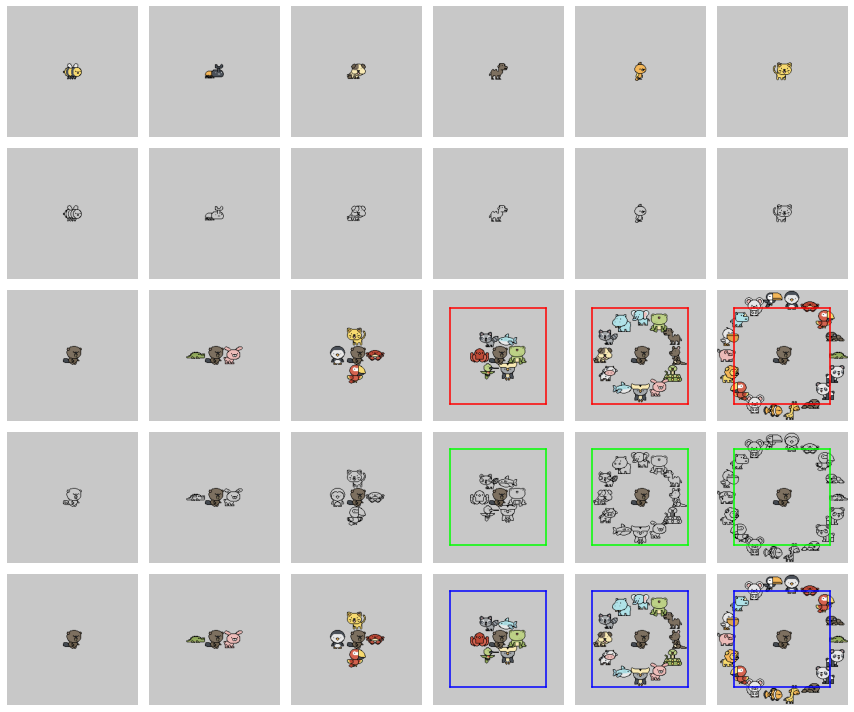

In [ ]:
### RF size with respect to stimulus

# layers where RF size > 50 pix
alexnet_rf = {'conv2':51,'conv3':99,'conv4':131,'conv5':163};
vgg16_rf = {'conv8':60,'conv9':76,'conv10':92,'conv11':132,'conv12':164,'conv13':196}; 
resnet50_rf = {'layer2_2':59,'layer2_3':75,'layer2_4':91,
               'layer3_1':107,'layer3_2':139,'layer3_3':171,'layer3_4':198,'layer3_5':235,'layer3_6':267,
               'layer4_1':299,'layer4_2':363,'layer4_3':427}; 

from PIL import Image;
import matplotlib.pyplot as plt;
import numpy as np;

example_stims = [None]*30
## color target
example_stims[0] = '/content/gdrive/My Drive/UW_PasupathyLab/ShortTermWork/Artiphysiology2020/Animal_Icons/stims/class00/stim0002.png'
example_stims[1] = '/content/gdrive/My Drive/UW_PasupathyLab/ShortTermWork/Artiphysiology2020/Animal_Icons/stims/class00/stim0003.png'
example_stims[2] = '/content/gdrive/My Drive/UW_PasupathyLab/ShortTermWork/Artiphysiology2020/Animal_Icons/stims/class00/stim0004.png'
example_stims[3] = '/content/gdrive/My Drive/UW_PasupathyLab/ShortTermWork/Artiphysiology2020/Animal_Icons/stims/class00/stim0005.png'
example_stims[4] = '/content/gdrive/My Drive/UW_PasupathyLab/ShortTermWork/Artiphysiology2020/Animal_Icons/stims/class00/stim0006.png'
example_stims[5] = '/content/gdrive/My Drive/UW_PasupathyLab/ShortTermWork/Artiphysiology2020/Animal_Icons/stims/class00/stim0007.png'
## line target
example_stims[6] = '/content/gdrive/My Drive/UW_PasupathyLab/ShortTermWork/Artiphysiology2020/Animal_Icons/stims/class11/stim1102.png'
example_stims[7] = '/content/gdrive/My Drive/UW_PasupathyLab/ShortTermWork/Artiphysiology2020/Animal_Icons/stims/class11/stim1103.png'
example_stims[8] = '/content/gdrive/My Drive/UW_PasupathyLab/ShortTermWork/Artiphysiology2020/Animal_Icons/stims/class11/stim1104.png'
example_stims[9] = '/content/gdrive/My Drive/UW_PasupathyLab/ShortTermWork/Artiphysiology2020/Animal_Icons/stims/class11/stim1105.png'
example_stims[10] = '/content/gdrive/My Drive/UW_PasupathyLab/ShortTermWork/Artiphysiology2020/Animal_Icons/stims/class11/stim1106.png'
example_stims[11] = '/content/gdrive/My Drive/UW_PasupathyLab/ShortTermWork/Artiphysiology2020/Animal_Icons/stims/class11/stim1107.png'
## color surround
example_stims[12] = '/content/gdrive/My Drive/UW_PasupathyLab/ShortTermWork/Artiphysiology2020/Animal_Icons/stims/class00/stim0001.png'
example_stims[13] = '/content/gdrive/My Drive/UW_PasupathyLab/ShortTermWork/Artiphysiology2020/Animal_Icons/stims/class01/stim0101.png'
example_stims[14] = '/content/gdrive/My Drive/UW_PasupathyLab/ShortTermWork/Artiphysiology2020/Animal_Icons/stims/class02/stim0201.png'
example_stims[15] = '/content/gdrive/My Drive/UW_PasupathyLab/ShortTermWork/Artiphysiology2020/Animal_Icons/stims/class03/stim0301.png'
example_stims[16] = '/content/gdrive/My Drive/UW_PasupathyLab/ShortTermWork/Artiphysiology2020/Animal_Icons/stims/class04/stim0401.png'
example_stims[17] = '/content/gdrive/My Drive/UW_PasupathyLab/ShortTermWork/Artiphysiology2020/Animal_Icons/stims/class05/stim0501.png'
## line surround
example_stims[18] = '/content/gdrive/My Drive/UW_PasupathyLab/ShortTermWork/Artiphysiology2020/Animal_Icons/stims/class11/stim1101.png'
example_stims[19] = '/content/gdrive/My Drive/UW_PasupathyLab/ShortTermWork/Artiphysiology2020/Animal_Icons/stims/class06/stim0601.png'
example_stims[20] = '/content/gdrive/My Drive/UW_PasupathyLab/ShortTermWork/Artiphysiology2020/Animal_Icons/stims/class07/stim0701.png'
example_stims[21] = '/content/gdrive/My Drive/UW_PasupathyLab/ShortTermWork/Artiphysiology2020/Animal_Icons/stims/class08/stim0801.png'
example_stims[22] = '/content/gdrive/My Drive/UW_PasupathyLab/ShortTermWork/Artiphysiology2020/Animal_Icons/stims/class09/stim0901.png'
example_stims[23] = '/content/gdrive/My Drive/UW_PasupathyLab/ShortTermWork/Artiphysiology2020/Animal_Icons/stims/class10/stim1001.png'
## color surround
example_stims[24] = '/content/gdrive/My Drive/UW_PasupathyLab/ShortTermWork/Artiphysiology2020/Animal_Icons/stims/class00/stim0001.png'
example_stims[25] = '/content/gdrive/My Drive/UW_PasupathyLab/ShortTermWork/Artiphysiology2020/Animal_Icons/stims/class01/stim0101.png'
example_stims[26] = '/content/gdrive/My Drive/UW_PasupathyLab/ShortTermWork/Artiphysiology2020/Animal_Icons/stims/class02/stim0201.png'
example_stims[27] = '/content/gdrive/My Drive/UW_PasupathyLab/ShortTermWork/Artiphysiology2020/Animal_Icons/stims/class03/stim0301.png'
example_stims[28] = '/content/gdrive/My Drive/UW_PasupathyLab/ShortTermWork/Artiphysiology2020/Animal_Icons/stims/class04/stim0401.png'
example_stims[29] = '/content/gdrive/My Drive/UW_PasupathyLab/ShortTermWork/Artiphysiology2020/Animal_Icons/stims/class05/stim0501.png'



rf_size = 107;
plt.figure(figsize=(12,10));
for i in range(len(example_stims)):
    plt.subplot(5,6,i+1);
    im = Image.open(example_stims[i]);
    plt.imshow(im)

    if (i+1>12) and (i%6>=3):
        if i+1<=18:
            rf_sizes = list(alexnet_rf.values());
            lineC = [1,0,0];
        elif i+1<=24:
            rf_sizes = list(vgg16_rf.values());              
            lineC = [0,1,0];            
        else:
            rf_sizes = list(resnet50_rf.values());              
            lineC = [0,0,1];                        

        rf_sizes = [164];
        for rf_size in rf_sizes:
            plt.plot([112-rf_size/2,112-rf_size/2],[112-rf_size/2,112+rf_size/2],color=lineC);
            plt.plot([112+rf_size/2,112+rf_size/2],[112-rf_size/2,112+rf_size/2],color=lineC);    
            plt.plot([112-rf_size/2,112+rf_size/2],[112-rf_size/2,112-rf_size/2],color=lineC);
            plt.plot([112-rf_size/2,112+rf_size/2],[112+rf_size/2,112+rf_size/2],color=lineC);    
            
    plt.xlim((0,224));
    plt.ylim((0,224));
    plt.gca().invert_yaxis()
    plt.axis('off')
plt.tight_layout()
plt.savefig('stim_examples.pdf', bbox_inches = "tight")

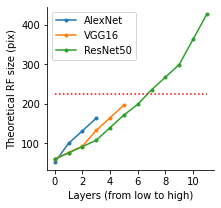

In [ ]:
### RF size comparison across ANNs
# layers where RF size > 50 pix
alexnet_rf = {'conv2':51,'conv3':99,'conv4':131,'conv5':163};
vgg16_rf = {'conv8':60,'conv9':76,'conv10':92,'conv11':132,'conv12':164,'conv13':196}; 
resnet50_rf = {'layer2_2':59,'layer2_3':75,'layer2_4':91,
               'layer3_1':107,'layer3_2':139,'layer3_3':171,'layer3_4':198,'layer3_5':235,'layer3_6':267,
               'layer4_1':299,'layer4_2':363,'layer4_3':427}; 

import matplotlib.pyplot as plt;

plt.figure(figsize=(3,3))
plt.plot(list(alexnet_rf.values()),'.-',label='AlexNet');
plt.plot(list(vgg16_rf.values()),'.-',label='VGG16');
plt.plot(list(resnet50_rf.values()),'.-',label='ResNet50');
plt.plot([0,11],[224,224],'r:');
plt.xticks(ticks=range(0,11,2))
plt.xlabel('Layers (from low to high)');
plt.ylabel('Theoretical RF size (pix)');
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.savefig('rf_size.pdf', bbox_inches = "tight")

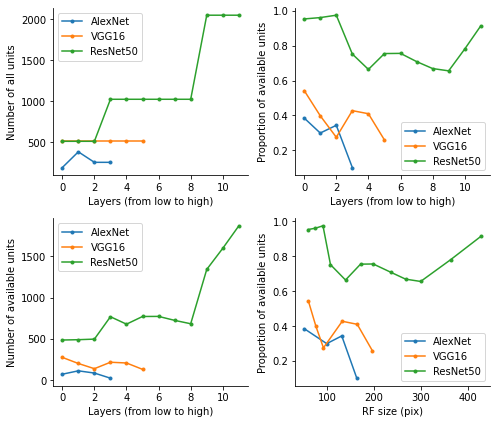

In [ ]:
### Available units in ANNs
# units that respond to at least 10 out of 100 target stimuli were included in the analysis. 

def get_availableUnits(modelname):
    numValid_Units = [];
    all_Units = [];

    if modelname=='alexnet':
        data = data1;
    elif modelname=='vgg16':
        data = data2;
    elif modelname=='resnet50':
        data = data3;     

    for i in range(len(data)):
        target_layer = list(data.keys())[i];
        # in each unit, check how many target stimuli could evoke response>0        
        respond_to = [];
        for i in range(np.shape(data[target_layer])[1]):
            respond_to.append(len(np.where(data[target_layer][:100,i]>0)[0]));
        respond_to = np.array(respond_to);    

        # if a unit responds to >10 target stims, it can be a vaild unit
        numValid_Units.append(len(np.where(respond_to>=10)[0]));
        # how many units in each layer
        all_Units.append(np.shape(data[target_layer])[1]);

    numValid_Units = np.array(numValid_Units);
    all_Units = np.array(all_Units);        

    return numValid_Units, all_Units;


numValid_Units1, all_Units1 = get_availableUnits('alexnet');
numValid_Units2, all_Units2 = get_availableUnits('vgg16');
numValid_Units3, all_Units3 = get_availableUnits('resnet50');

# available units, all units
plt.figure(figsize=(7,6))
plt.subplot(2,2,1);
plt.plot(all_Units1,'.-',label='AlexNet');
plt.plot(all_Units2,'.-',label='VGG16');
plt.plot(all_Units3,'.-',label='ResNet50');
plt.xticks(ticks=range(0,11,2))
plt.xlabel('Layers (from low to high)');
plt.ylabel('Number of all units');
plt.legend();
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.subplot(2,2,3);
plt.plot(numValid_Units1,'.-',label='AlexNet');
plt.plot(numValid_Units2,'.-',label='VGG16');
plt.plot(numValid_Units3,'.-',label='ResNet50');
plt.xticks(ticks=range(0,11,2))
plt.xlabel('Layers (from low to high)');
plt.ylabel('Number of available units');
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Proportion of available units
plt.subplot(2,2,2);
plt.plot(numValid_Units1/all_Units1,'.-',label='AlexNet');
plt.plot(numValid_Units2/all_Units2,'.-',label='VGG16');
plt.plot(numValid_Units3/all_Units3,'.-',label='ResNet50');
plt.xticks(ticks=range(0,11,2))
plt.xlabel('Layers (from low to high)');
plt.ylabel('Proportion of available units');
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.subplot(2,2,4);
plt.plot(list(alexnet_rf.values()),numValid_Units1/all_Units1,'.-',label='AlexNet');
plt.plot(list(vgg16_rf.values()),numValid_Units2/all_Units2,'.-',label='VGG16');
plt.plot(list(resnet50_rf.values()),numValid_Units3/all_Units3,'.-',label='ResNet50');
plt.xlabel('RF size (pix)');
plt.ylabel('Proportion of available units');
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig('available_units.pdf', bbox_inches = "tight")

In [ ]:
### Make correlation Table
column_list = ['coTar_coDis2','coTar_coDis4','coTar_coDis6','coTar_coDis12',
               'coTar_coDis18','coTar_liDis2','coTar_liDis4','coTar_liDis6',
               'coTar_liDis12','coTar_liDis18','liTar'];

def make_CorrTable(modelname):
    CorrMtx = {};
    if modelname=='alexnet':
        data = data1;
        modelnameNew = 'AlexNet'
    elif modelname=='vgg16':
        data = data2;
        modelnameNew = 'VGG16'
    elif modelname=='resnet50':
        data = data3;     
        modelnameNew = 'ResNet50'

    for i in range(len(data)):
        target_layer = list(data.keys())[i];
        numUnits = np.shape(data[target_layer])[1];

        corrLayer = [];
        for j in range(numUnits):
            coTar_resp = data[target_layer][0:100,j];

            # check if the unit responded to more than 10 coTar stimuli
            if len(np.where(coTar_resp[:]>0)[0])>=10:
                corrNow = np.empty((1,11));
                for k in range(11):
                    coTar_surr_resp = data[target_layer][eval(column_list[k]),j];
                    corrNow[0,k] = np.corrcoef(coTar_resp,coTar_surr_resp)[0,1];
            else:
                corrNow = np.empty((1,11));
                corrNow[:] = np.nan;

            corrLayer.append(corrNow);
        
        corrLayer = np.squeeze(corrLayer); ## row: unit number, column: correlations       
        CorrMtx[target_layer] = pd.DataFrame(corrLayer,
                                              columns=column_list);
        print(modelnameNew+': '+target_layer+' was processed');
  
    return CorrMtx;

CorrMtx1 = make_CorrTable('alexnet');
CorrMtx2 = make_CorrTable('vgg16');
CorrMtx3 = make_CorrTable('resnet50');


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


AlexNet: conv2 was processed
AlexNet: conv3 was processed
AlexNet: conv4 was processed
AlexNet: conv5 was processed
VGG16: conv8 was processed
VGG16: conv9 was processed
VGG16: conv10 was processed
VGG16: conv11 was processed
VGG16: conv12 was processed
VGG16: conv13 was processed
ResNet50: layer2_2 was processed
ResNet50: layer2_3 was processed
ResNet50: layer2_4 was processed
ResNet50: layer3_1 was processed
ResNet50: layer3_2 was processed
ResNet50: layer3_3 was processed
ResNet50: layer3_4 was processed
ResNet50: layer3_5 was processed
ResNet50: layer3_6 was processed
ResNet50: layer4_1 was processed
ResNet50: layer4_2 was processed
ResNet50: layer4_3 was processed


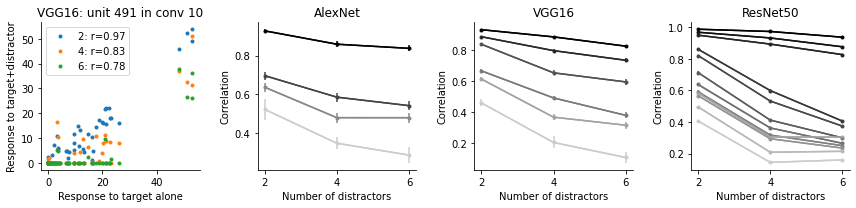

In [ ]:
### Distractor number effect
from scipy import stats

plt.figure(figsize=(12,3));

# Example
plt.subplot(1,4,1)
plt.plot(data2['conv10'][eval('coTar'),491],data2['conv10'][eval('coTar_coDis2'),491],'.',label='2: r=0.97')
plt.plot(data2['conv10'][eval('coTar'),491],data2['conv10'][eval('coTar_coDis4'),491],'.',label='4: r=0.83')
plt.plot(data2['conv10'][eval('coTar'),491],data2['conv10'][eval('coTar_coDis6'),491],'.',label='6: r=0.78')
plt.xlabel('Response to target alone');
plt.ylabel('Response to target+distractor');
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)    
plt.title('VGG16: unit 491 in conv 10')
plt.legend()


# AlexNet
plt.subplot(1,4,2);
for i in range(len(CorrMtx1)):
    layerNow = list(CorrMtx1.keys())[i];
    y_val = [CorrMtx1[layerNow]['coTar_coDis2'].mean(),
             CorrMtx1[layerNow]['coTar_coDis4'].mean(),
             CorrMtx1[layerNow]['coTar_coDis6'].mean()];
    y_err = [stats.sem(CorrMtx1[layerNow]['coTar_coDis2'],nan_policy='omit'),
             stats.sem(CorrMtx1[layerNow]['coTar_coDis4'],nan_policy='omit'),
             stats.sem(CorrMtx1[layerNow]['coTar_coDis6'],nan_policy='omit')];
    line_color = i*np.array([0.8,0.8,0.8])/(len(CorrMtx1)-1)
    plt.plot(range(3),y_val,'.-',color=line_color);             
    plt.errorbar(range(3),y_val,yerr=y_err,color=line_color);
plt.xticks(ticks=[0,1,2],labels=[2,4,6]);    
plt.xlabel('Number of distractors');
plt.ylabel('Correlation');
plt.title('AlexNet');
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# VGG16
plt.subplot(1,4,3);
for i in range(len(CorrMtx2)):
    layerNow = list(CorrMtx2.keys())[i];
    y_val = [CorrMtx2[layerNow]['coTar_coDis2'].mean(),
             CorrMtx2[layerNow]['coTar_coDis4'].mean(),
             CorrMtx2[layerNow]['coTar_coDis6'].mean()];
    y_err = [stats.sem(CorrMtx2[layerNow]['coTar_coDis2'],nan_policy='omit'),
             stats.sem(CorrMtx2[layerNow]['coTar_coDis4'],nan_policy='omit'),
             stats.sem(CorrMtx2[layerNow]['coTar_coDis6'],nan_policy='omit')];
    line_color = i*np.array([0.8,0.8,0.8])/(len(CorrMtx2)-1)
    plt.plot(range(3),y_val,'.-',color=line_color);
    plt.errorbar(range(3),y_val,yerr=y_err,color=line_color);
plt.xticks(ticks=[0,1,2],labels=[2,4,6]);
plt.xlabel('Number of distractors');
plt.ylabel('Correlation');
plt.title('VGG16');
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# ResNet50
plt.subplot(1,4,4);
for i in range(len(CorrMtx3)):
    layerNow = list(CorrMtx3.keys())[i];
    y_val = [CorrMtx3[layerNow]['coTar_coDis2'].mean(),
             CorrMtx3[layerNow]['coTar_coDis4'].mean(),
             CorrMtx3[layerNow]['coTar_coDis6'].mean()];
    y_err = [stats.sem(CorrMtx3[layerNow]['coTar_coDis2'],nan_policy='omit'),
             stats.sem(CorrMtx3[layerNow]['coTar_coDis4'],nan_policy='omit'),
             stats.sem(CorrMtx3[layerNow]['coTar_coDis6'],nan_policy='omit')];
    line_color = i*np.array([0.8,0.8,0.8])/(len(CorrMtx3)-1)
    plt.plot(range(3),y_val,'.-',color=line_color);             
    plt.errorbar(range(3),y_val,yerr=y_err,color=line_color);
plt.xticks(ticks=[0,1,2],labels=[2,4,6]);    
plt.xlabel('Number of distractors');
plt.ylabel('Correlation');
plt.title('ResNet50');
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout();
plt.savefig('corr_distractor_number.pdf', bbox_inches = "tight")

In [ ]:
layer = 'conv13';
cond = 'coTar_coDis12'
CorrMtx = CorrMtx2
#CorrMtx[layer][(CorrMtx[layer][cond]==CorrMtx[layer][cond].max()) | (CorrMtx[layer][cond]==CorrMtx[layer][cond].min())][['coTar_coDis2','coTar_coDis4','coTar_coDis6']]
CorrMtx[layer].sort_values(by='coTar_coDis12',ascending=False).head(20)

,coTar_coDis2,coTar_coDis4,coTar_coDis6,coTar_coDis12,coTar_coDis18,coTar_liDis2,coTar_liDis4,coTar_liDis6,coTar_liDis12,coTar_liDis18,liTar
285,NaN,NaN,NaN,0.941100,0.989681,NaN,NaN,NaN,0.949109,0.990017,NaN
334,0.733573,NaN,NaN,0.934170,0.988860,0.791810,NaN,NaN,0.945748,0.989653,NaN
80,0.829939,0.333930,0.185613,0.907077,0.990903,0.790382,0.513680,0.545149,0.937587,0.993246,0.525060
203,0.719310,0.569606,0.355260,0.903439,0.984604,0.736646,0.566466,0.303965,0.900684,0.988146,0.806401
210,0.629909,0.199894,NaN,0.900852,0.931733,0.627808,NaN,NaN,0.889979,0.939198,0.202550
293,0.851061,NaN,NaN,0.895965,0.944998,0.652486,0.704890,NaN,0.897050,0.946679,NaN
17,0.741934,NaN,NaN,0.885792,0.957932,0.607841,NaN,NaN,0.881666,0.957901,0.405750
185,0.776734,NaN,NaN,0.885668,0.946520,0.824196,NaN,NaN,0.896886,0.951394,0.152964
466,0.235395,NaN,NaN,0.874928,0.937762,0.357818,NaN,NaN,0.913183,0.947013,0.374536
337,0.658332,0.492331,0.209223,0.874318,0.989686,0.620684,0.446537,-0.166213,0.892752,0.991071,0.598688


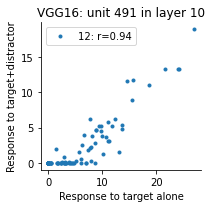

In [ ]:
plt.figure(figsize=(3,3));
#plt.plot(data2['conv13'][eval('coTar'),491],data2['conv13'][eval('coTar_coDis6'),491],'.',label='6: r=0.97')
plt.plot(data2['conv13'][eval('coTar'),80],data2['conv13'][eval('coTar_coDis12'),80],'.',label='12: r=0.94')
#plt.plot(data2['conv13'][eval('coTar'),491],data2['conv13'][eval('coTar_coDis18'),491],'.',label='18: r=0.78')
plt.xlabel('Response to target alone');
plt.ylabel('Response to target+distractor');
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)    
plt.title('VGG16: unit 491 in layer 10')
plt.legend()
plt.tight_layout()
plt.savefig('corr_distractor_number_example.pdf', bbox_inches = "tight")

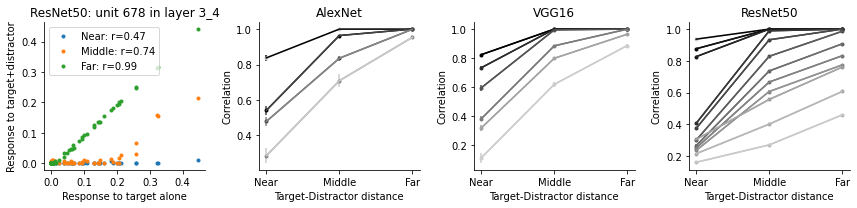

In [ ]:
### Distractor distance effect
from scipy import stats

plt.figure(figsize=(12,3));

# Example
plt.subplot(1,4,1);
plt.plot(data3['layer3_4'][eval('coTar'),678],data3['layer3_4'][eval('coTar_coDis6'),678],'.',label='Near: r=0.47')
plt.plot(data3['layer3_4'][eval('coTar'),678],data3['layer3_4'][eval('coTar_coDis12'),678],'.',label='Middle: r=0.74')
plt.plot(data3['layer3_4'][eval('coTar'),678],data3['layer3_4'][eval('coTar_coDis18'),678],'.',label='Far: r=0.99')
plt.xlabel('Response to target alone');
plt.ylabel('Response to target+distractor');
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)    
plt.title('ResNet50: unit 678 in layer 3_4')
plt.legend()
plt.tight_layout()


# AlexNet
plt.subplot(1,4,2);
for i in range(len(CorrMtx1)):
    layerNow = list(CorrMtx1.keys())[i];
    y_val = [CorrMtx1[layerNow]['coTar_coDis6'].mean(),
             CorrMtx1[layerNow]['coTar_coDis12'].mean(),
             CorrMtx1[layerNow]['coTar_coDis18'].mean()];
    y_err = [stats.sem(CorrMtx1[layerNow]['coTar_coDis6'],nan_policy='omit'),
             stats.sem(CorrMtx1[layerNow]['coTar_coDis12'],nan_policy='omit'),
             stats.sem(CorrMtx1[layerNow]['coTar_coDis18'],nan_policy='omit')];
    plt.plot(range(3),y_val,'.-',color=line_color);             
    line_color = i*np.array([0.8,0.8,0.8])/(len(CorrMtx1)-1)
    plt.errorbar(range(3),y_val,yerr=y_err,color=line_color);
plt.xticks(ticks=[0,1,2],labels=['Near','Middle','Far']);    
plt.xlabel('Target-Distractor distance');
plt.ylabel('Correlation');
plt.title('AlexNet');
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# VGG16
plt.subplot(1,4,3);
for i in range(len(CorrMtx2)):
    layerNow = list(CorrMtx2.keys())[i];
    y_val = [CorrMtx2[layerNow]['coTar_coDis6'].mean(),
             CorrMtx2[layerNow]['coTar_coDis12'].mean(),
             CorrMtx2[layerNow]['coTar_coDis18'].mean()];
    y_err = [stats.sem(CorrMtx2[layerNow]['coTar_coDis6'],nan_policy='omit'),
             stats.sem(CorrMtx2[layerNow]['coTar_coDis12'],nan_policy='omit'),
             stats.sem(CorrMtx2[layerNow]['coTar_coDis18'],nan_policy='omit')];
    line_color = i*np.array([0.8,0.8,0.8])/(len(CorrMtx2)-1)
    plt.plot(range(3),y_val,'.-',color=line_color);
    plt.errorbar(range(3),y_val,yerr=y_err,color=line_color);
plt.xticks(ticks=[0,1,2],labels=['Near','Middle','Far']);
plt.xlabel('Target-Distractor distance');
plt.ylabel('Correlation');
plt.title('VGG16');
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# ResNet50
plt.subplot(1,4,4);
for i in range(len(CorrMtx3)):
    layerNow = list(CorrMtx3.keys())[i];
    y_val = [CorrMtx3[layerNow]['coTar_coDis6'].mean(),
             CorrMtx3[layerNow]['coTar_coDis12'].mean(),
             CorrMtx3[layerNow]['coTar_coDis18'].mean()];
    y_err = [stats.sem(CorrMtx3[layerNow]['coTar_coDis6'],nan_policy='omit'),
             stats.sem(CorrMtx3[layerNow]['coTar_coDis12'],nan_policy='omit'),
             stats.sem(CorrMtx3[layerNow]['coTar_coDis18'],nan_policy='omit')];
    plt.plot(range(3),y_val,'.-',color=line_color);             
    line_color = i*np.array([0.8,0.8,0.8])/(len(CorrMtx3)-1)
    plt.errorbar(range(3),y_val,yerr=y_err,color=line_color);
plt.xticks(ticks=[0,1,2],labels=['Near','Middle','Far']);    
plt.xlabel('Target-Distractor distance');
plt.ylabel('Correlation');
plt.title('ResNet50');
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout();

plt.savefig('corr_distractor_distance.pdf', bbox_inches = "tight")

In [ ]:
layer = 'conv3';
CorrMtx = CorrMtx1
#CorrMtx[layer][(CorrMtx[layer][cond]==CorrMtx[layer][cond].max()) | (CorrMtx[layer][cond]==CorrMtx[layer][cond].min())][['coTar_coDis2','coTar_coDis4','coTar_coDis6']]
CorrMtx[layer].sort_values(by='coTar_liDis6',ascending=False).iloc[0:30,:]

,coTar_coDis2,coTar_coDis4,coTar_coDis6,coTar_coDis12,coTar_coDis18,coTar_liDis2,coTar_liDis4,coTar_liDis6,coTar_liDis12,coTar_liDis18,liTar
341,0.948659,0.749425,0.908560,0.997655,1.0,0.970139,0.969786,0.954553,0.997747,1.0,NaN
97,0.960449,0.873738,0.691637,0.994345,1.0,0.959088,0.879237,0.954040,0.997622,1.0,0.247552
49,0.873867,0.908714,0.858625,0.990275,1.0,0.894740,0.814543,0.900484,0.987372,1.0,0.251590
296,0.924206,0.627489,0.868426,0.988106,1.0,0.881428,0.904922,0.895258,0.989589,1.0,0.170431
179,0.641247,0.474456,0.831191,0.994356,1.0,0.662185,0.812143,0.879509,0.995391,1.0,0.246723
38,0.925637,0.895073,0.899983,0.984279,1.0,0.938018,0.915653,0.863576,0.991334,1.0,-0.012237
9,0.911715,0.091842,0.854045,0.991952,1.0,0.975704,0.912759,0.860169,0.995566,1.0,NaN
40,0.803649,NaN,0.819843,0.982834,1.0,0.766515,0.588593,0.857769,0.982256,1.0,0.880588
56,0.784444,0.926607,NaN,0.992298,1.0,0.948927,0.916211,0.855628,0.992695,1.0,NaN
110,0.766474,0.759993,0.772978,0.898241,1.0,0.666995,0.853047,0.833845,0.896812,1.0,0.908204


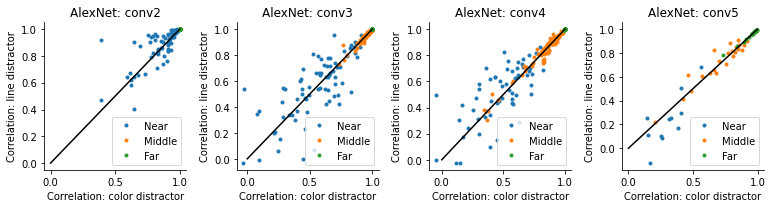

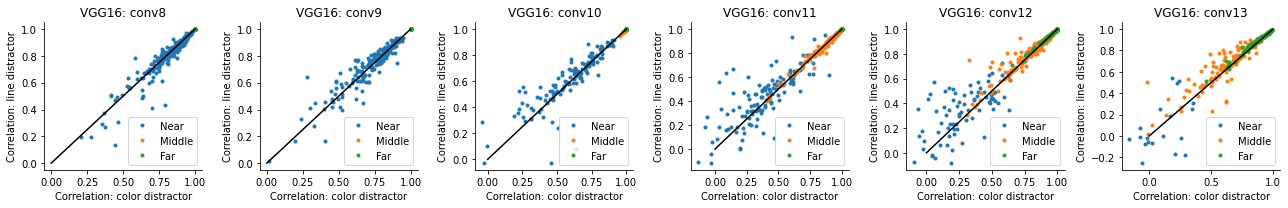

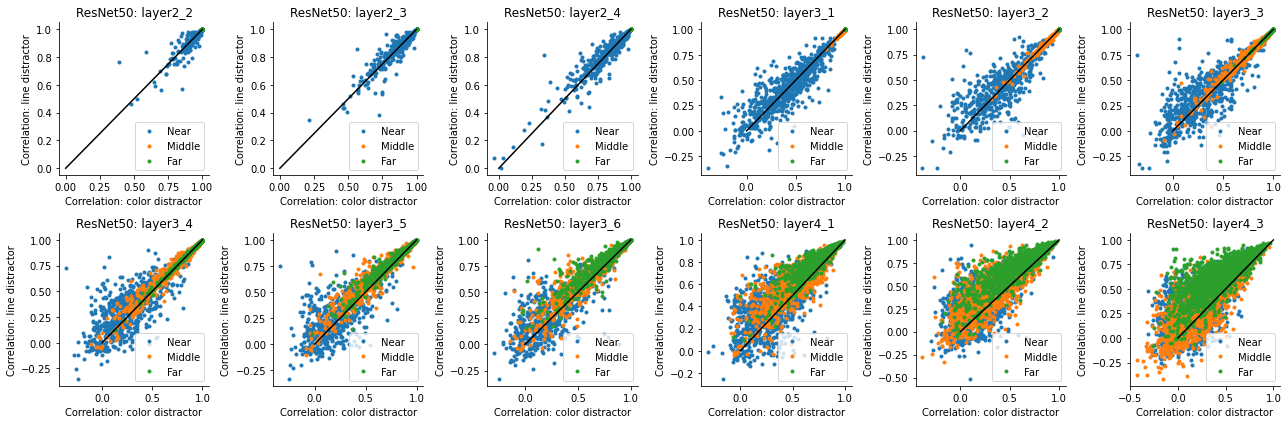

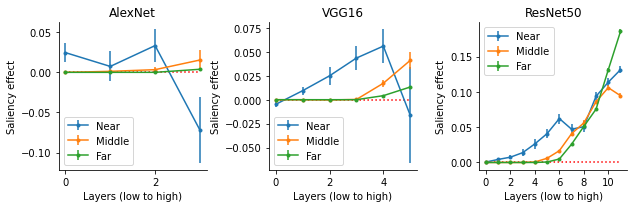

In [ ]:
### Distractor color effect
from scipy import stats

# AlexNet
plt.figure(figsize=(10.85,3));
N_saliency1 = [];   N_saliency1_err = [];
M_saliency1 = [];   M_saliency1_err = [];
F_saliency1 = [];   F_saliency1_err = [];
for i in range(len(CorrMtx1)):
    plt.subplot(1,4,i+1)
    layerNow = list(CorrMtx1.keys())[i];
    #plt.plot(CorrMtx1[layerNow]['coTar_coDis2'],CorrMtx1[layerNow]['coTar_liDis2'],'.',label='2N');             
    #plt.plot(CorrMtx1[layerNow]['coTar_coDis4'],CorrMtx1[layerNow]['coTar_liDis4'],'.',label='4N');                 
    plt.plot(CorrMtx1[layerNow]['coTar_coDis6'],CorrMtx1[layerNow]['coTar_liDis6'],'.',label='Near');                     
    plt.plot(CorrMtx1[layerNow]['coTar_coDis12'],CorrMtx1[layerNow]['coTar_liDis12'],'.',label='Middle');                     
    plt.plot(CorrMtx1[layerNow]['coTar_coDis18'],CorrMtx1[layerNow]['coTar_liDis18'],'.',label='Far');    
    plt.plot([0,1],[0,1],'k');                         
    plt.xlabel('Correlation: color distractor');
    plt.ylabel('Correlation: line distractor');
    plt.legend(loc='lower right')
    plt.title('AlexNet: '+layerNow);
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)

    N_saliency1.append(np.nanmean(CorrMtx1[layerNow]['coTar_liDis6']-CorrMtx1[layerNow]['coTar_coDis6']));
    M_saliency1.append(np.nanmean(CorrMtx1[layerNow]['coTar_liDis12']-CorrMtx1[layerNow]['coTar_coDis12']));
    F_saliency1.append(np.nanmean(CorrMtx1[layerNow]['coTar_liDis18']-CorrMtx1[layerNow]['coTar_coDis18']));        
    N_saliency1_err.append(stats.sem(CorrMtx1[layerNow]['coTar_liDis6']-CorrMtx1[layerNow]['coTar_coDis6'],nan_policy='omit'));
    M_saliency1_err.append(stats.sem(CorrMtx1[layerNow]['coTar_liDis12']-CorrMtx1[layerNow]['coTar_coDis12'],nan_policy='omit'));
    F_saliency1_err.append(stats.sem(CorrMtx1[layerNow]['coTar_liDis18']-CorrMtx1[layerNow]['coTar_coDis18'],nan_policy='omit'));        
plt.tight_layout();


# VGG16
plt.figure(figsize=(18,3));
N_saliency2 = [];   N_saliency2_err = [];
M_saliency2 = [];   M_saliency2_err = [];
F_saliency2 = [];   F_saliency2_err = [];
for i in range(len(CorrMtx2)):
    plt.subplot(1,6,i+1)
    layerNow = list(CorrMtx2.keys())[i];
    #plt.plot(CorrMtx2[layerNow]['coTar_coDis2'],CorrMtx2[layerNow]['coTar_liDis2'],'.',label='2N');             
    #plt.plot(CorrMtx2[layerNow]['coTar_coDis4'],CorrMtx2[layerNow]['coTar_liDis4'],'.',label='4N');                 
    plt.plot(CorrMtx2[layerNow]['coTar_coDis6'],CorrMtx2[layerNow]['coTar_liDis6'],'.',label='Near');                     
    plt.plot(CorrMtx2[layerNow]['coTar_coDis12'],CorrMtx2[layerNow]['coTar_liDis12'],'.',label='Middle');                     
    plt.plot(CorrMtx2[layerNow]['coTar_coDis18'],CorrMtx2[layerNow]['coTar_liDis18'],'.',label='Far');     
    plt.plot([0,1],[0,1],'k');                                                     
    plt.xlabel('Correlation: color distractor');
    plt.ylabel('Correlation: line distractor');
    plt.legend(loc='lower right')
    plt.title('VGG16: '+layerNow);
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)

    N_saliency2.append(np.nanmean(CorrMtx2[layerNow]['coTar_liDis6']-CorrMtx2[layerNow]['coTar_coDis6']));
    M_saliency2.append(np.nanmean(CorrMtx2[layerNow]['coTar_liDis12']-CorrMtx2[layerNow]['coTar_coDis12']));
    F_saliency2.append(np.nanmean(CorrMtx2[layerNow]['coTar_liDis18']-CorrMtx2[layerNow]['coTar_coDis18']));        
    N_saliency2_err.append(stats.sem(CorrMtx2[layerNow]['coTar_liDis6']-CorrMtx2[layerNow]['coTar_coDis6'],nan_policy='omit'));
    M_saliency2_err.append(stats.sem(CorrMtx2[layerNow]['coTar_liDis12']-CorrMtx2[layerNow]['coTar_coDis12'],nan_policy='omit'));
    F_saliency2_err.append(stats.sem(CorrMtx2[layerNow]['coTar_liDis18']-CorrMtx2[layerNow]['coTar_coDis18'],nan_policy='omit'));        
plt.tight_layout();



# ResNet50
plt.figure(figsize=(18,6));
N_saliency3 = [];   N_saliency3_err = [];
M_saliency3 = [];   M_saliency3_err = [];
F_saliency3 = [];   F_saliency3_err = [];
for i in range(len(CorrMtx3)):
    plt.subplot(2,6,i+1)
    layerNow = list(CorrMtx3.keys())[i];
    #plt.plot(CorrMtx3[layerNow]['coTar_coDis2'],CorrMtx3[layerNow]['coTar_liDis2'],'.',label='2N');             
    #plt.plot(CorrMtx3[layerNow]['coTar_coDis4'],CorrMtx3[layerNow]['coTar_liDis4'],'.',label='4N');                 
    plt.plot(CorrMtx3[layerNow]['coTar_coDis6'],CorrMtx3[layerNow]['coTar_liDis6'],'.',label='Near');                     
    plt.plot(CorrMtx3[layerNow]['coTar_coDis12'],CorrMtx3[layerNow]['coTar_liDis12'],'.',label='Middle');                     
    plt.plot(CorrMtx3[layerNow]['coTar_coDis18'],CorrMtx3[layerNow]['coTar_liDis18'],'.',label='Far');     
    plt.plot([0,1],[0,1],'k');                                                     
    plt.xlabel('Correlation: color distractor');
    plt.ylabel('Correlation: line distractor');
    plt.legend(loc='lower right')
    plt.title('ResNet50: '+layerNow);
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)

    N_saliency3.append(np.nanmean(CorrMtx3[layerNow]['coTar_liDis6']-CorrMtx3[layerNow]['coTar_coDis6']));
    M_saliency3.append(np.nanmean(CorrMtx3[layerNow]['coTar_liDis12']-CorrMtx3[layerNow]['coTar_coDis12']));
    F_saliency3.append(np.nanmean(CorrMtx3[layerNow]['coTar_liDis18']-CorrMtx3[layerNow]['coTar_coDis18']));        
    N_saliency3_err.append(stats.sem(CorrMtx3[layerNow]['coTar_liDis6']-CorrMtx3[layerNow]['coTar_coDis6'],nan_policy='omit'));
    M_saliency3_err.append(stats.sem(CorrMtx3[layerNow]['coTar_liDis12']-CorrMtx3[layerNow]['coTar_coDis12'],nan_policy='omit'));
    F_saliency3_err.append(stats.sem(CorrMtx3[layerNow]['coTar_liDis18']-CorrMtx3[layerNow]['coTar_coDis18'],nan_policy='omit'));        
plt.tight_layout();
plt.savefig('saliency_corr_ResNet50.pdf', bbox_inches = "tight")


# Summary 

plt.figure(figsize=(9,3))

plt.subplot(1,3,1)
plt.errorbar(range(4),N_saliency1,N_saliency1_err,marker='.',label='Near');
plt.errorbar(range(4),M_saliency1,M_saliency1_err,marker='.',label='Middle');
plt.errorbar(range(4),F_saliency1,F_saliency1_err,marker='.',label='Far');
plt.plot([0,3],[0,0],'r:');
plt.xticks(ticks=range(0,4,2));
plt.legend();
plt.xlabel('Layers (low to high)')
plt.ylabel('Saliency effect')
plt.title('AlexNet');
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.subplot(1,3,2)
plt.errorbar(range(6),N_saliency2,N_saliency2_err,marker='.',label='Near');
plt.errorbar(range(6),M_saliency2,M_saliency2_err,marker='.',label='Middle');
plt.errorbar(range(6),F_saliency2,F_saliency2_err,marker='.',label='Far');
plt.plot([0,5],[0,0],'r:');
plt.xticks(ticks=range(0,5,2));
plt.legend();
plt.xlabel('Layers (low to high)')
plt.ylabel('Saliency effect')
plt.title('VGG16');
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.subplot(1,3,3);
plt.errorbar(range(12),N_saliency3,N_saliency3_err,marker='.',label='Near');
plt.errorbar(range(12),M_saliency3,M_saliency3_err,marker='.',label='Middle');
plt.errorbar(range(12),F_saliency3,F_saliency3_err,marker='.',label='Far');
plt.plot([0,11],[0,0],'r:');
plt.xticks(ticks=range(0,11,2));
plt.legend();
plt.xlabel('Layers (low to high)')
plt.ylabel('Saliency effect')
plt.title('ResNet50');
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig('saliency_corr_3ANNs.pdf', bbox_inches = "tight")

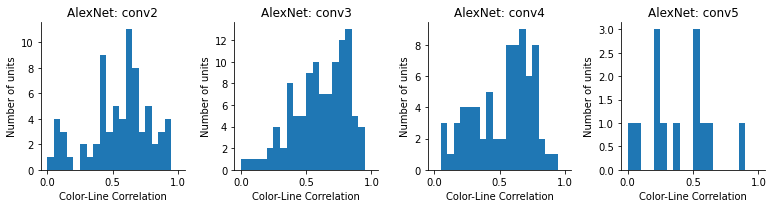

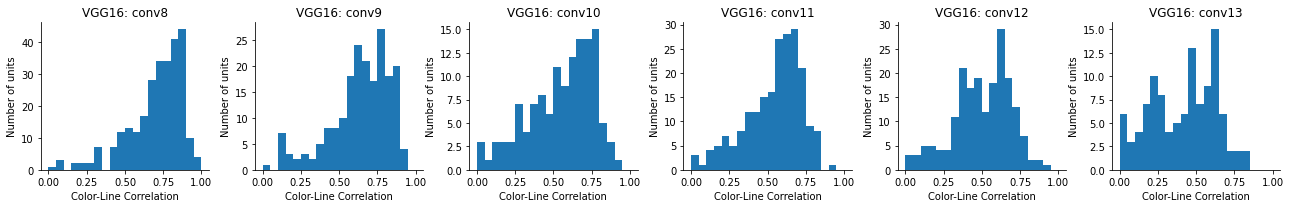

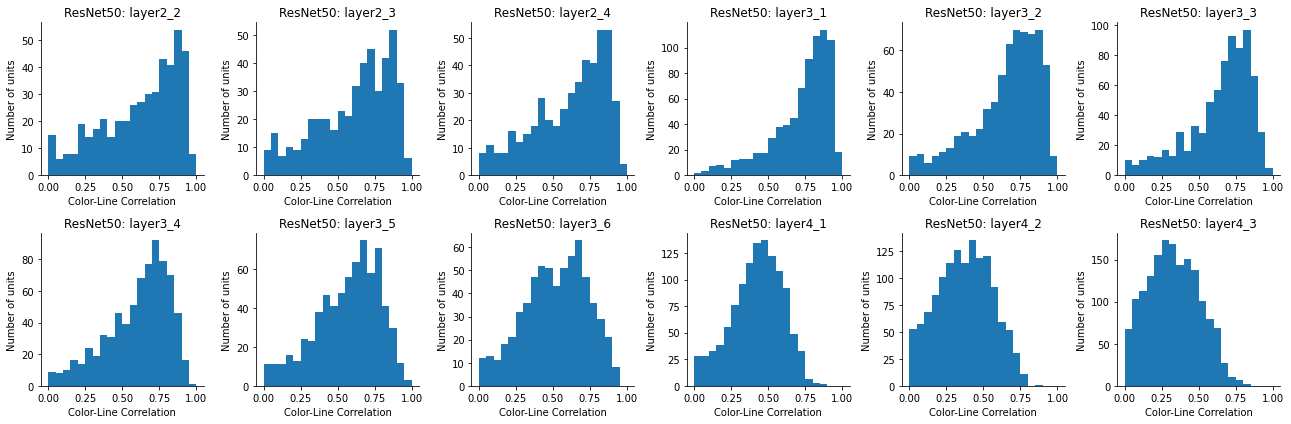

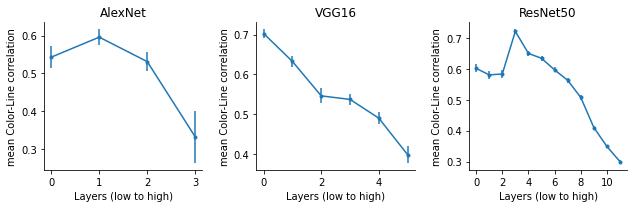

In [ ]:
### color target vs. line target
from scipy import stats

# AlexNet
plt.figure(figsize=(10.85,3));
CoLi1 = [];   CoLi1_err = [];
for i in range(len(CorrMtx1)):
    plt.subplot(1,4,i+1)
    layerNow = list(CorrMtx1.keys())[i];
    plt.hist(CorrMtx1[layerNow]['liTar'],bins=np.arange(0,1.05,0.05));   
    plt.xlabel('Color-Line Correlation')                  
    plt.ylabel('Number of units')                  
    plt.title('AlexNet: '+layerNow)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)    

    CoLi1.append(np.nanmean(CorrMtx1[layerNow]['liTar']))
    CoLi1_err.append(stats.sem(CorrMtx1[layerNow]['liTar'],nan_policy='omit'))    
plt.tight_layout()



# VGG16
plt.figure(figsize=(18,3));
CoLi2 = [];   CoLi2_err = [];
for i in range(len(CorrMtx2)):
    plt.subplot(1,6,i+1)
    layerNow = list(CorrMtx2.keys())[i];
    plt.hist(CorrMtx2[layerNow]['liTar'],bins=np.arange(0,1.05,0.05));   
    plt.xlabel('Color-Line Correlation')                  
    plt.ylabel('Number of units')                  
    plt.title('VGG16: '+layerNow)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)    

    CoLi2.append(np.nanmean(CorrMtx2[layerNow]['liTar']))
    CoLi2_err.append(stats.sem(CorrMtx2[layerNow]['liTar'],nan_policy='omit'))    
plt.tight_layout()


# ResNet50
plt.figure(figsize=(18,6));
CoLi3 = [];   CoLi3_err = [];
for i in range(len(CorrMtx3)):
    plt.subplot(2,6,i+1)
    layerNow = list(CorrMtx3.keys())[i];
    plt.hist(CorrMtx3[layerNow]['liTar'],bins=np.arange(0,1.05,0.05));   
    plt.xlabel('Color-Line Correlation')                  
    plt.ylabel('Number of units')                  
    plt.title('ResNet50: '+layerNow)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)    

    CoLi3.append(np.nanmean(CorrMtx3[layerNow]['liTar']))
    CoLi3_err.append(stats.sem(CorrMtx3[layerNow]['liTar'],nan_policy='omit'))    
plt.tight_layout()
plt.savefig('color_line_corr_ResNet50.pdf', bbox_inches = "tight")

# Summary
plt.figure(figsize=(9,3));

plt.subplot(1,3,1);
plt.errorbar(range(4),CoLi1,CoLi1_err,marker='.');
plt.xlabel('Layers (low to high)')
plt.ylabel('mean Color-Line correlation')
plt.title('AlexNet');
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.subplot(1,3,2);
plt.errorbar(range(6),CoLi2,CoLi2_err,marker='.');
plt.xlabel('Layers (low to high)')
plt.ylabel('mean Color-Line correlation')
plt.title('VGG16');
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.subplot(1,3,3);
plt.errorbar(range(12),CoLi3,CoLi3_err,marker='.');
plt.xlabel('Layers (low to high)')
plt.ylabel('mean Color-Line correlation')
plt.title('ResNet50');
plt.xticks(ticks=range(0,12,2))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout();
plt.savefig('color_line_corr_3ANNs.pdf', bbox_inches = "tight")

In [ ]:
layer = 'conv12';
CorrMtx = CorrMtx2
#CorrMtx[layer][(CorrMtx[layer][cond]==CorrMtx[layer][cond].max()) | (CorrMtx[layer][cond]==CorrMtx[layer][cond].min())][['coTar_coDis2','coTar_coDis4','coTar_coDis6']]
CorrMtx[layer].sort_values(by='coTar_coDis12',ascending=True).head(20)

,coTar_coDis2,coTar_coDis4,coTar_coDis6,coTar_coDis12,coTar_coDis18,coTar_liDis2,coTar_liDis4,coTar_liDis6,coTar_liDis12,coTar_liDis18,liTar
59,0.444554,NaN,NaN,0.184768,0.950693,NaN,NaN,NaN,NaN,0.958119,0.357657
431,0.562253,0.297961,0.158071,0.307829,0.992332,0.529666,0.182696,0.064461,0.307829,0.993211,0.335326
506,0.786987,NaN,0.502330,0.327148,0.879797,0.739792,NaN,0.647741,0.746329,0.887647,0.160630
461,0.396312,NaN,NaN,0.346977,0.822646,-0.033709,NaN,NaN,0.396736,0.851625,0.116098
507,0.387317,NaN,NaN,0.372605,0.963985,0.337145,NaN,NaN,0.372605,0.971964,0.533923
464,0.605653,NaN,NaN,0.382475,0.980552,0.693662,NaN,NaN,0.393012,0.983120,0.818540
454,NaN,NaN,NaN,0.411390,0.921312,NaN,NaN,NaN,0.425340,0.928314,0.340844
369,0.365320,0.073056,-0.097363,0.418968,0.811307,0.425473,0.094350,-0.076819,0.481595,0.828383,0.266578
172,0.806859,NaN,NaN,0.475624,0.987997,0.733352,NaN,0.163934,0.540653,0.990013,0.381701
194,NaN,NaN,NaN,0.483151,0.931606,NaN,NaN,NaN,0.690284,0.943726,0.414417


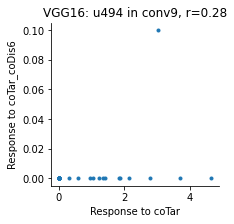

In [ ]:
plt.figure(figsize=(3,3))
plt.plot(data2['conv12'][eval('coTar'),461],data2['conv12'][eval('coTar_coDis12'),461],'.');
plt.xlabel('Response to coTar');
plt.ylabel('Response to coTar_coDis6');
plt.title('VGG16: u494 in conv9, r=0.28')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)    

In [ ]:
### Make meanResp table
column_list = ['coTar','base','coDis2','coDis4','coDis6','coDis12','coDis18',
               'liTar','liDis2','liDis4','liDis6','liDis12','liDis18',
               'coTar_coDis2','coTar_coDis4','coTar_coDis6','coTar_coDis12',
               'coTar_coDis18','coTar_liDis2','coTar_liDis4','coTar_liDis6',
               'coTar_liDis12','coTar_liDis18'];

def make_meanRespMtx(modelname):
    meanRespMtx = {};
    if modelname=='alexnet':
        data = data1;
        modelnameNew = 'AlexNet'
    elif modelname=='vgg16':
        data = data2;
        modelnameNew = 'VGG16'
    elif modelname=='resnet50':
        data = data3;     
        modelnameNew = 'ResNet50'

    for i in range(len(data)):
        target_layer = list(data.keys())[i];
        numUnits = np.shape(data[target_layer])[1];

        meanRespLayer = [];
        for j in range(numUnits):
            coTar_resp = data[target_layer][0:100,j];

            # check if the unit responded to more than 10 coTar stimuli
            if len(np.where(coTar_resp[:]>0)[0])>=10:
                meanRespNow = np.empty((1,23));
                for k in range(23):
                    resp = data[target_layer][eval(column_list[k]),j];
                    meanRespNow[0,k] = np.mean(resp);
            else:
                meanRespNow = np.empty((1,23));
                meanRespNow[:] = np.nan;

            meanRespLayer.append(meanRespNow);
        
        meanRespLayer = np.squeeze(meanRespLayer); ## row: unit number, column: meanResp       
        meanRespMtx[target_layer] = pd.DataFrame(meanRespLayer,columns=column_list);
        print(modelnameNew+': '+target_layer+' was processed');  

    return meanRespMtx;        

meanRespMtx1 = make_meanRespMtx('alexnet')
meanRespMtx2 = make_meanRespMtx('vgg16')
meanRespMtx3 = make_meanRespMtx('resnet50')

AlexNet: conv2 was processed
AlexNet: conv3 was processed
AlexNet: conv4 was processed
AlexNet: conv5 was processed
VGG16: conv8 was processed
VGG16: conv9 was processed
VGG16: conv10 was processed
VGG16: conv11 was processed
VGG16: conv12 was processed
VGG16: conv13 was processed
ResNet50: layer2_2 was processed
ResNet50: layer2_3 was processed
ResNet50: layer2_4 was processed
ResNet50: layer3_1 was processed
ResNet50: layer3_2 was processed
ResNet50: layer3_3 was processed
ResNet50: layer3_4 was processed
ResNet50: layer3_5 was processed
ResNet50: layer3_6 was processed
ResNet50: layer4_1 was processed
ResNet50: layer4_2 was processed
ResNet50: layer4_3 was processed


In [ ]:
meanRespMtx2['conv12'].sort_values(by='coDis12',ascending=True)

,coTar,base,coDis2,coDis4,coDis6,coDis12,coDis18,liTar,liDis2,liDis4,liDis6,liDis12,liDis18,coTar_coDis2,coTar_coDis4,coTar_coDis6,coTar_coDis12,coTar_coDis18,coTar_liDis2,coTar_liDis4,coTar_liDis6,coTar_liDis12,coTar_liDis18
0,7.901297,0.000000,0.0,0.000000,0.0,0.0,0.0,0.546001,0.000000,0.000000,0.0,0.000000,0.0,0.903837,0.047703,0.000000,2.363361,6.589674,1.664855,0.137078,0.004338,2.993572,6.718922
307,0.248547,0.000000,0.0,2.071811,0.0,0.0,0.0,0.053153,0.545373,0.788726,0.0,0.304063,0.0,0.064377,0.684776,0.000000,0.299312,0.151804,0.052378,0.448609,0.000000,0.299110,0.157083
309,0.271834,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.007496,0.000000,0.044795,0.218683,0.000000,0.000000,0.000000,0.127044,0.223262
310,0.686467,0.032645,0.0,0.000000,0.0,0.0,0.0,1.373040,0.000000,0.000000,0.0,0.000000,0.0,0.476550,0.022173,0.670689,0.782053,0.832517,0.792373,0.047357,0.808682,0.599472,0.812892
311,0.446225,0.000000,0.0,0.000000,0.0,0.0,0.0,0.009196,0.000000,0.000000,0.0,0.000000,0.0,0.044294,0.273694,0.030217,0.046321,0.906015,0.025672,0.081459,0.169686,0.045488,0.916572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


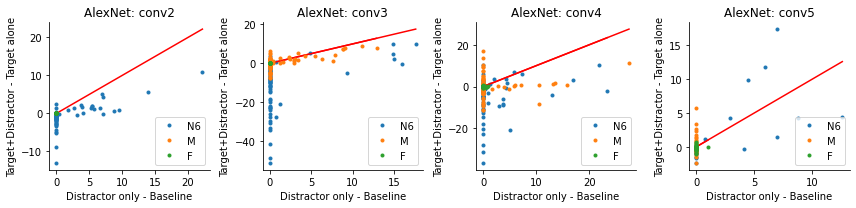

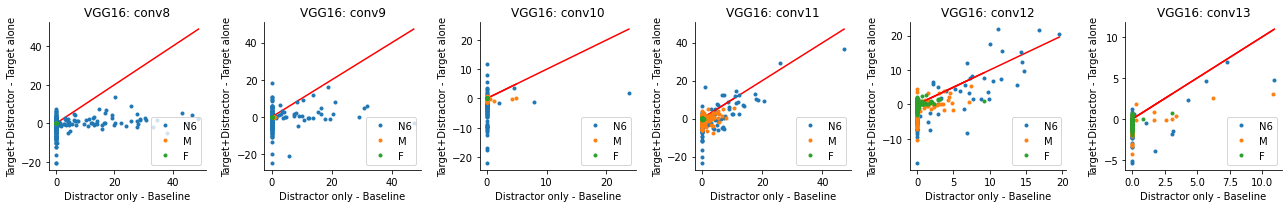

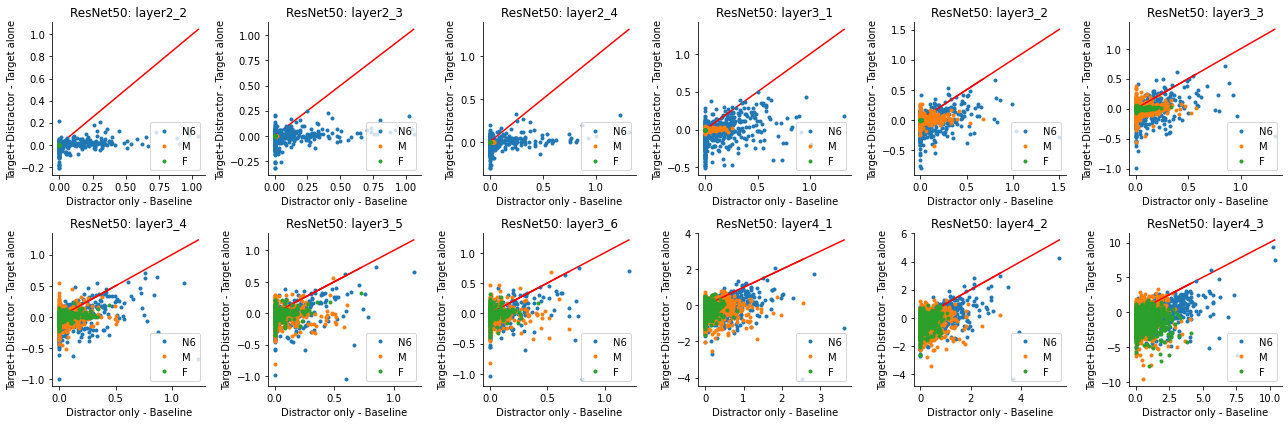

In [ ]:
### Surround modulation as a function of distractor only

# AlexNet
plt.figure(figsize=(12,3));
for i in range(len(meanRespMtx1)):
    target_layer = list(meanRespMtx1.keys())[i];

    plt.subplot(1,4,i+1);
    """
    xval = meanRespMtx1[target_layer]['coDis2']-meanRespMtx1[target_layer]['base'];
    xval = xval.clip(lower=0);
    yval = meanRespMtx1[target_layer]['coTar_coDis2']-meanRespMtx1[target_layer]['coTar'] 
    plt.plot([0,np.max(xval)],[0,np.max(xval)],'r')
    plt.plot(xval,yval,'.',label='N2');

    xval = meanRespMtx1[target_layer]['coDis4']-meanRespMtx1[target_layer]['base'];
    xval = xval.clip(lower=0);    
    yval = meanRespMtx1[target_layer]['coTar_coDis4']-meanRespMtx1[target_layer]['coTar']
    plt.plot([0,np.max(xval)],[0,np.max(xval)],'r')    
    plt.plot(xval,yval,'.',label='N4');
    """
    xval = meanRespMtx1[target_layer]['coDis6']-meanRespMtx1[target_layer]['base'];
    xval = xval.clip(lower=0);    
    yval = meanRespMtx1[target_layer]['coTar_coDis6']-meanRespMtx1[target_layer]['coTar'] 
    plt.plot([0,np.max(xval)],[0,np.max(xval)],'r')    
    plt.plot(xval,yval,'.',label='N6');
    
    xval = meanRespMtx1[target_layer]['coDis12']-meanRespMtx1[target_layer]['base'];
    xval = xval.clip(lower=0);    
    yval = meanRespMtx1[target_layer]['coTar_coDis12']-meanRespMtx1[target_layer]['coTar'] 
    plt.plot([0,np.max(xval)],[0,np.max(xval)],'r')    
    plt.plot(xval,yval,'.',label='M');
    
    xval = meanRespMtx1[target_layer]['coDis18']-meanRespMtx1[target_layer]['base'];
    xval = xval.clip(lower=0);    
    yval = meanRespMtx1[target_layer]['coTar_coDis18']-meanRespMtx1[target_layer]['coTar'] 
    plt.plot([0,np.max(xval)],[0,np.max(xval)],'r')    
    plt.plot(xval,yval,'.',label='F');
    
    plt.legend(loc='lower right');
    plt.title('AlexNet: '+target_layer)
    plt.xlabel('Distractor only - Baseline');
    plt.ylabel('Target+Distractor - Target alone');
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)    
plt.tight_layout()


# VGG16
plt.figure(figsize=(18,3));
for i in range(len(meanRespMtx2)):
    target_layer = list(meanRespMtx2.keys())[i];

    plt.subplot(1,6,i+1);
    """
    xval = meanRespMtx2[target_layer]['coDis2']-meanRespMtx2[target_layer]['base'];
    xval = xval.clip(lower=0);    
    yval = meanRespMtx2[target_layer]['coTar_coDis2']-meanRespMtx2[target_layer]['coTar'] 
    plt.plot([0,np.max(xval)],[0,np.max(xval)],'r')
    plt.plot(xval,yval,'.',label='N2');

    xval = meanRespMtx2[target_layer]['coDis4']-meanRespMtx2[target_layer]['base'];
    xval = xval.clip(lower=0);    
    yval = meanRespMtx2[target_layer]['coTar_coDis4']-meanRespMtx2[target_layer]['coTar']
    plt.plot([0,np.max(xval)],[0,np.max(xval)],'r')    
    plt.plot(xval,yval,'.',label='N4');
    """
    xval = meanRespMtx2[target_layer]['coDis6']-meanRespMtx2[target_layer]['base'];
    xval = xval.clip(lower=0);    
    yval = meanRespMtx2[target_layer]['coTar_coDis6']-meanRespMtx2[target_layer]['coTar'] 
    plt.plot([0,np.max(xval)],[0,np.max(xval)],'r')    
    plt.plot(xval,yval,'.',label='N6');
    
    xval = meanRespMtx2[target_layer]['coDis12']-meanRespMtx2[target_layer]['base'];
    xval = xval.clip(lower=0);    
    yval = meanRespMtx2[target_layer]['coTar_coDis12']-meanRespMtx2[target_layer]['coTar'] 
    plt.plot([0,np.max(xval)],[0,np.max(xval)],'r')    
    plt.plot(xval,yval,'.',label='M');

    xval = meanRespMtx2[target_layer]['coDis18']-meanRespMtx2[target_layer]['base'];
    xval = xval.clip(lower=0);    
    yval = meanRespMtx2[target_layer]['coTar_coDis18']-meanRespMtx2[target_layer]['coTar'] 
    plt.plot([0,np.max(xval)],[0,np.max(xval)],'r')    
    plt.plot(xval,yval,'.',label='F');
    

    plt.legend(loc='lower right');
    plt.title('VGG16: '+target_layer)
    plt.xlabel('Distractor only - Baseline');
    plt.ylabel('Target+Distractor - Target alone');
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)    
plt.tight_layout()




# ResNet50
plt.figure(figsize=(18,6));
for i in range(len(meanRespMtx3)):
    target_layer = list(meanRespMtx3.keys())[i];

    plt.subplot(2,6,i+1);
    """
    xval = meanRespMtx3[target_layer]['coDis2']-meanRespMtx3[target_layer]['base'];
    xval = xval.clip(lower=0);    
    yval = meanRespMtx3[target_layer]['coTar_coDis2']-meanRespMtx3[target_layer]['coTar'] 
    plt.plot([0,np.max(xval)],[0,np.max(xval)],'r')
    plt.plot(xval,yval,'.',label='N2');

    xval = meanRespMtx3[target_layer]['coDis4']-meanRespMtx3[target_layer]['base'];
    xval = xval.clip(lower=0);    
    yval = meanRespMtx3[target_layer]['coTar_coDis4']-meanRespMtx3[target_layer]['coTar']
    plt.plot([0,np.max(xval)],[0,np.max(xval)],'r')    
    plt.plot(xval,yval,'.',label='N4');
    """
    xval = meanRespMtx3[target_layer]['coDis6']-meanRespMtx3[target_layer]['base'];
    xval = xval.clip(lower=0);    
    yval = meanRespMtx3[target_layer]['coTar_coDis6']-meanRespMtx3[target_layer]['coTar'] 
    plt.plot([0,np.max(xval)],[0,np.max(xval)],'r')    
    plt.plot(xval,yval,'.',label='N6');
    
    xval = meanRespMtx3[target_layer]['coDis12']-meanRespMtx3[target_layer]['base'];
    xval = xval.clip(lower=0);    
    yval = meanRespMtx3[target_layer]['coTar_coDis12']-meanRespMtx3[target_layer]['coTar'] 
    plt.plot([0,np.max(xval)],[0,np.max(xval)],'r')    
    plt.plot(xval,yval,'.',label='M');

    xval = meanRespMtx3[target_layer]['coDis18']-meanRespMtx3[target_layer]['base'];
    xval = xval.clip(lower=0);    
    yval = meanRespMtx3[target_layer]['coTar_coDis18']-meanRespMtx3[target_layer]['coTar'] 
    plt.plot([0,np.max(xval)],[0,np.max(xval)],'r')    
    plt.plot(xval,yval,'.',label='F');
    
    plt.legend(loc='lower right');
    plt.title('ResNet50: '+target_layer)
    plt.xlabel('Distractor only - Baseline');
    plt.ylabel('Target+Distractor - Target alone');
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)    
plt.tight_layout()

In [ ]:
### Modulation index
# MI = (Target+Distractor) / (Target alone + max[(Distractor alone - Baseline),0])

conditions = ['coTar_coDis2','coTar_coDis4','coTar_coDis6','coTar_coDis12','coTar_coDis18',
              'coTar_liDis2','coTar_liDis4','coTar_liDis6','coTar_liDis12','coTar_liDis18']

def make_modulationMtx(modelname,meanRespMtx):
    def compute_modulation(meanRespMtx,target_layer,condition):
        num_val = meanRespMtx[target_layer][condition];
        denum_val = (meanRespMtx[target_layer]['coTar']
                     +(meanRespMtx[target_layer][condition.split('_')[1]]
                     -meanRespMtx[target_layer]['base']).clip(lower=0));
        #denum_val = (meanRespMtx[target_layer]['coTar']
        #             +meanRespMtx[target_layer][condition.split('_')[1]])


        return num_val/denum_val;

    modulationMtx = {};
    if modelname=='alexnet':
        modelnameNew = 'AlexNet'
    elif modelname=='vgg16':
        modelnameNew = 'VGG16'
    elif modelname=='resnet50':
        modelnameNew = 'ResNet50'

    for i in range(len(meanRespMtx)):
        target_layer = list(meanRespMtx.keys())[i];

        modulationLayer = pd.DataFrame();
        for condition in conditions:
            modulationNow = compute_modulation(meanRespMtx,target_layer,condition);
            modulationLayer[condition] = modulationNow;
        modulationMtx[target_layer] = modulationLayer;
    return modulationMtx

modulationMtx1 = make_modulationMtx('alexnet',meanRespMtx1)
modulationMtx2 = make_modulationMtx('vgg16',meanRespMtx2)
modulationMtx3 = make_modulationMtx('resnet50',meanRespMtx3)


In [ ]:
modulationMtx1['conv3'].describe()

,coTar_coDis2,coTar_coDis4,coTar_coDis6,coTar_coDis12,coTar_coDis18,coTar_liDis2,coTar_liDis4,coTar_liDis6,coTar_liDis12,coTar_liDis18
count,115.000000,115.000000,115.000000,115.000000,1.150000e+02,115.000000,115.000000,115.000000,115.000000,1.150000e+02
mean,0.702292,0.490554,0.248396,0.966563,9.999999e-01,0.617663,0.326308,0.317918,0.983057,9.999999e-01
std,1.261850,1.300964,0.360672,0.409191,3.494996e-07,1.081140,0.556550,0.543400,0.454639,3.226131e-07
min,0.000000,0.000000,0.000000,0.031197,9.999982e-01,0.000000,0.000000,0.000000,0.050844,9.999982e-01
25%,0.112162,0.000000,0.000211,0.746982,9.999999e-01,0.095979,0.000000,0.000025,0.743147,9.999999e-01
50%,0.330190,0.067575,0.083495,0.946242,1.000000e+00,0.290831,0.098750,0.099853,0.939630,1.000000e+00
75%,0.657868,0.394747,0.376775,1.145510,1.000000e+00,0.638704,0.348813,0.412897,1.199804,1.000000e+00
max,8.187822,10.943688,1.907681,2.356576,1.000001e+00,8.223759,3.808276,3.745687,2.814512,1.000000e+00


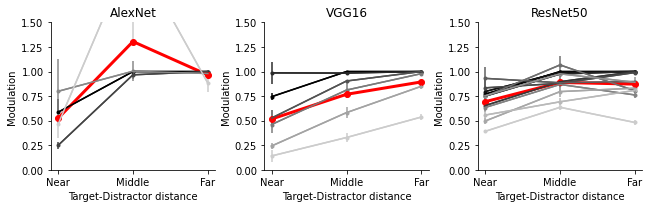

In [ ]:
### Plot modulation strength: Target-distractor distance
from scipy import stats

plt.figure(figsize=(12,3));

# AlexNet
plt.subplot(1,4,1);
y_val_all = np.empty((3,0));
for i in range(len(modulationMtx1)):
    layerNow = list(modulationMtx1.keys())[i];
    y_val = [modulationMtx1[layerNow]['coTar_coDis6'].mean(),
             modulationMtx1[layerNow]['coTar_coDis12'].mean(),
             modulationMtx1[layerNow]['coTar_coDis18'].mean()];
    y_err = [stats.sem(modulationMtx1[layerNow]['coTar_coDis6'],nan_policy='omit'),
             stats.sem(modulationMtx1[layerNow]['coTar_coDis12'],nan_policy='omit'),
             stats.sem(modulationMtx1[layerNow]['coTar_coDis18'],nan_policy='omit')];
    y_val_all = np.concatenate((y_val_all,np.reshape(y_val,(3,1))),axis=1)
    line_color = i*np.array([0.8,0.8,0.8])/(len(modulationMtx1)-1)    
    plt.plot(range(3),y_val,'.-',color=line_color);             
    plt.errorbar(range(3),y_val,yerr=y_err,color=line_color);
plt.plot(range(3),np.mean(y_val_all,axis=1),'ro-',linewidth=3);                 
plt.xticks(ticks=[0,1,2],labels=['Near','Middle','Far']);    
plt.ylim([0,1.5]);
plt.xlabel('Target-Distractor distance');
plt.ylabel('Modulation');
plt.title('AlexNet');
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# VGG16
plt.subplot(1,4,2);
y_val_all = np.empty((3,0));
for i in range(len(modulationMtx2)):
    layerNow = list(modulationMtx2.keys())[i];
    y_val = [modulationMtx2[layerNow]['coTar_coDis6'].mean(),
             modulationMtx2[layerNow]['coTar_coDis12'].mean(),
             modulationMtx2[layerNow]['coTar_coDis18'].mean()];
    y_err = [stats.sem(modulationMtx2[layerNow]['coTar_coDis6'],nan_policy='omit'),
             stats.sem(modulationMtx2[layerNow]['coTar_coDis12'],nan_policy='omit'),
             stats.sem(modulationMtx2[layerNow]['coTar_coDis18'],nan_policy='omit')];
    y_val_all = np.concatenate((y_val_all,np.reshape(y_val,(3,1))),axis=1)
    line_color = i*np.array([0.8,0.8,0.8])/(len(modulationMtx2)-1)    
    plt.plot(range(3),y_val,'.-',color=line_color);             
    plt.errorbar(range(3),y_val,yerr=y_err,color=line_color);
plt.plot(range(3),np.mean(y_val_all,axis=1),'ro-',linewidth=3);                 
plt.xticks(ticks=[0,1,2],labels=['Near','Middle','Far']);    
plt.ylim([0,1.5]);
plt.xlabel('Target-Distractor distance');
plt.ylabel('Modulation');
plt.title('VGG16');
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# ResNet50
plt.subplot(1,4,3);
y_val_all = np.empty((3,0));
for i in range(len(modulationMtx3)):
    layerNow = list(modulationMtx3.keys())[i];
    y_val = [modulationMtx3[layerNow]['coTar_coDis6'].mean(),
             modulationMtx3[layerNow]['coTar_coDis12'].mean(),
             modulationMtx3[layerNow]['coTar_coDis18'].mean()];
    y_err = [stats.sem(modulationMtx3[layerNow]['coTar_coDis6'],nan_policy='omit'),
             stats.sem(modulationMtx3[layerNow]['coTar_coDis12'],nan_policy='omit'),
             stats.sem(modulationMtx3[layerNow]['coTar_coDis18'],nan_policy='omit')];
    y_val_all = np.concatenate((y_val_all,np.reshape(y_val,(3,1))),axis=1)
    line_color = i*np.array([0.8,0.8,0.8])/(len(modulationMtx3)-1)    
    plt.plot(range(3),y_val,'.-',color=line_color);             
    plt.errorbar(range(3),y_val,yerr=y_err,color=line_color);
plt.plot(range(3),np.mean(y_val_all,axis=1),'ro-',linewidth=3);                 
plt.xticks(ticks=[0,1,2],labels=['Near','Middle','Far']);    
plt.ylim([0,1.5]);
plt.xlabel('Target-Distractor distance');
plt.ylabel('Modulation');
plt.title('ResNet50');
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig('distance_modulation_3ANNs.pdf', bbox_inches = "tight")

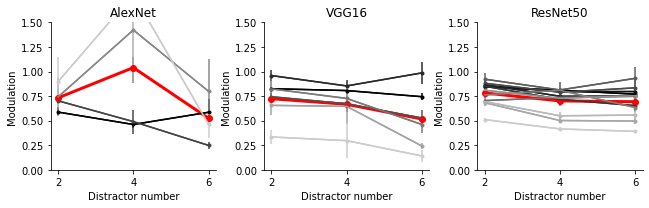

In [ ]:
### Plot modulation strength: Distractor number
from scipy import stats

plt.figure(figsize=(12,3));

# AlexNet
plt.subplot(1,4,1);
y_val_all = np.empty((3,0));
for i in range(len(modulationMtx1)):
    layerNow = list(modulationMtx1.keys())[i];
    y_val = [modulationMtx1[layerNow]['coTar_coDis2'].mean(),
             modulationMtx1[layerNow]['coTar_coDis4'].mean(),
             modulationMtx1[layerNow]['coTar_coDis6'].mean()];
    y_err = [stats.sem(modulationMtx1[layerNow]['coTar_coDis2'],nan_policy='omit'),
             stats.sem(modulationMtx1[layerNow]['coTar_coDis4'],nan_policy='omit'),
             stats.sem(modulationMtx1[layerNow]['coTar_coDis6'],nan_policy='omit')];
    y_val_all = np.concatenate((y_val_all,np.reshape(y_val,(3,1))),axis=1)
    line_color = i*np.array([0.8,0.8,0.8])/(len(modulationMtx1)-1)    
    plt.plot(range(3),y_val,'.-',color=line_color);             
    plt.errorbar(range(3),y_val,yerr=y_err,color=line_color);
plt.plot(range(3),np.mean(y_val_all,axis=1),'ro-',linewidth=3);                 
plt.xticks(ticks=[0,1,2],labels=[2,4,6]);    
plt.ylim([0,1.5]);
plt.xlabel('Distractor number');
plt.ylabel('Modulation');
plt.title('AlexNet');
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# VGG16
plt.subplot(1,4,2);
y_val_all = np.empty((3,0));
for i in range(len(modulationMtx2)):
    layerNow = list(modulationMtx2.keys())[i];
    y_val = [modulationMtx2[layerNow]['coTar_coDis2'].mean(),
             modulationMtx2[layerNow]['coTar_coDis4'].mean(),
             modulationMtx2[layerNow]['coTar_coDis6'].mean()];
    y_err = [stats.sem(modulationMtx2[layerNow]['coTar_coDis2'],nan_policy='omit'),
             stats.sem(modulationMtx2[layerNow]['coTar_coDis4'],nan_policy='omit'),
             stats.sem(modulationMtx2[layerNow]['coTar_coDis6'],nan_policy='omit')];
    y_val_all = np.concatenate((y_val_all,np.reshape(y_val,(3,1))),axis=1)
    line_color = i*np.array([0.8,0.8,0.8])/(len(modulationMtx2)-1)    
    plt.plot(range(3),y_val,'.-',color=line_color);             
    plt.errorbar(range(3),y_val,yerr=y_err,color=line_color);
plt.plot(range(3),np.mean(y_val_all,axis=1),'ro-',linewidth=3);                 
plt.xticks(ticks=[0,1,2],labels=[2,4,6]);    
plt.ylim([0,1.5]);
plt.xlabel('Distractor number');
plt.ylabel('Modulation');
plt.title('VGG16');
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# ResNet50
plt.subplot(1,4,3);
y_val_all = np.empty((3,0));
for i in range(len(modulationMtx3)):
    layerNow = list(modulationMtx3.keys())[i];
    y_val = [modulationMtx3[layerNow]['coTar_coDis2'].mean(),
             modulationMtx3[layerNow]['coTar_coDis4'].mean(),
             modulationMtx3[layerNow]['coTar_coDis6'].mean()];
    y_err = [stats.sem(modulationMtx3[layerNow]['coTar_coDis2'],nan_policy='omit'),
             stats.sem(modulationMtx3[layerNow]['coTar_coDis4'],nan_policy='omit'),
             stats.sem(modulationMtx3[layerNow]['coTar_coDis6'],nan_policy='omit')];
    y_val_all = np.concatenate((y_val_all,np.reshape(y_val,(3,1))),axis=1)
    line_color = i*np.array([0.8,0.8,0.8])/(len(modulationMtx3)-1)    
    plt.plot(range(3),y_val,'.-',color=line_color);             
    plt.errorbar(range(3),y_val,yerr=y_err,color=line_color);
plt.plot(range(3),np.mean(y_val_all,axis=1),'ro-',linewidth=3);                 
plt.xticks(ticks=[0,1,2],labels=[2,4,6]);    
plt.ylim([0,1.5]);
plt.xlabel('Distractor number');
plt.ylabel('Modulation');
plt.title('ResNet50');
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig('number_modulation_3ANNs.pdf', bbox_inches = "tight")

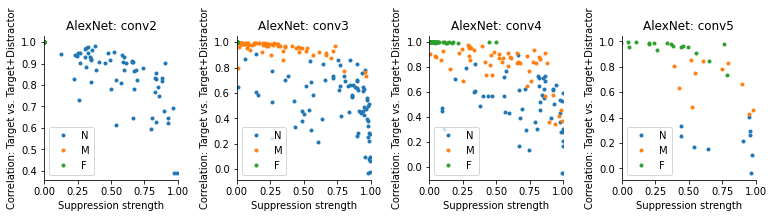

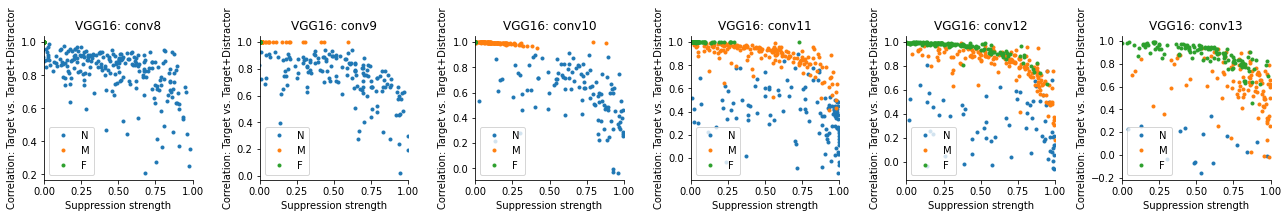

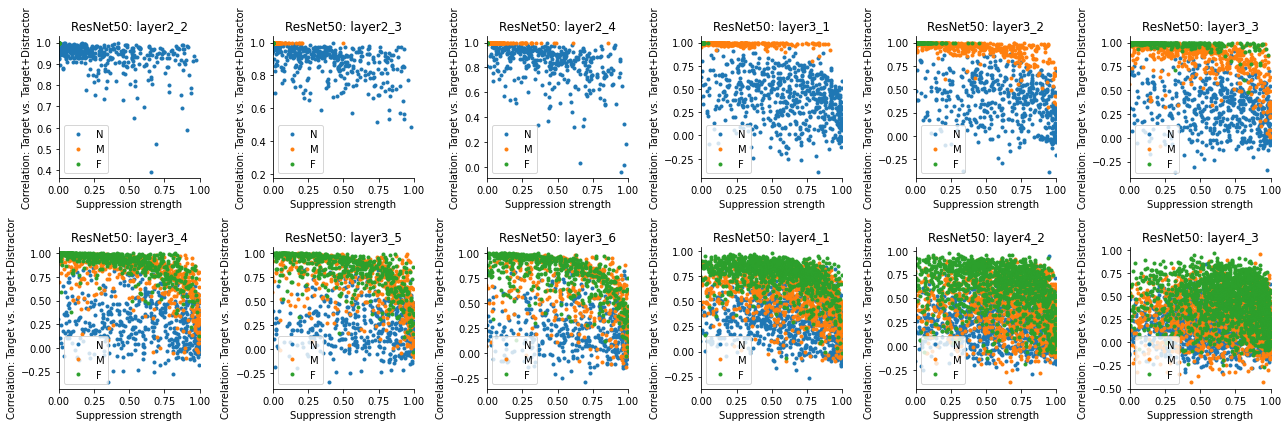

In [ ]:
### correlation vs. modulation
from scipy import stats

# AlexNet
plt.figure(figsize=(10.85,3));
for i in range(len(CorrMtx1)):
    plt.subplot(1,4,i+1)
    layerNow = list(CorrMtx1.keys())[i];
    plt.plot(1-modulationMtx1[layerNow]['coTar_coDis6'],CorrMtx1[layerNow]['coTar_coDis6'],'.',label='N');                     
    plt.plot(1-modulationMtx1[layerNow]['coTar_coDis12'],CorrMtx1[layerNow]['coTar_coDis12'],'.',label='M');                     
    plt.plot(1-modulationMtx1[layerNow]['coTar_coDis18'],CorrMtx1[layerNow]['coTar_coDis18'],'.',label='F');                     
    plt.xlabel('Suppression strength');
    plt.ylabel('Correlation: Target vs. Target+Distractor');
    plt.legend(loc='lower left')
    plt.title('AlexNet: '+layerNow);
    plt.xlim([0,1]);
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
plt.tight_layout();

# VGG16
plt.figure(figsize=(18,3));
for i in range(len(CorrMtx2)):
    plt.subplot(1,6,i+1)
    layerNow = list(CorrMtx2.keys())[i];
    plt.plot(1-modulationMtx2[layerNow]['coTar_coDis6'],CorrMtx2[layerNow]['coTar_coDis6'],'.',label='N');                     
    plt.plot(1-modulationMtx2[layerNow]['coTar_coDis12'],CorrMtx2[layerNow]['coTar_coDis12'],'.',label='M');                     
    plt.plot(1-modulationMtx2[layerNow]['coTar_coDis18'],CorrMtx2[layerNow]['coTar_coDis18'],'.',label='F');                     
    plt.xlabel('Suppression strength');
    plt.ylabel('Correlation: Target vs. Target+Distractor');
    plt.legend(loc='lower left')
    plt.title('VGG16: '+layerNow);
    plt.xlim([0,1]);
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
plt.tight_layout();


# ResNet50
plt.figure(figsize=(18,6));
for i in range(len(CorrMtx3)):
    plt.subplot(2,6,i+1)
    layerNow = list(CorrMtx3.keys())[i];
    plt.plot(1-modulationMtx3[layerNow]['coTar_coDis6'],CorrMtx3[layerNow]['coTar_coDis6'],'.',label='N');                     
    plt.plot(1-modulationMtx3[layerNow]['coTar_coDis12'],CorrMtx3[layerNow]['coTar_coDis12'],'.',label='M');                     
    plt.plot(1-modulationMtx3[layerNow]['coTar_coDis18'],CorrMtx3[layerNow]['coTar_coDis18'],'.',label='F');                     
    plt.xlabel('Suppression strength');
    plt.ylabel('Correlation: Target vs. Target+Distractor');
    plt.legend(loc='lower left')
    plt.title('ResNet50: '+layerNow);
    plt.xlim([0,1]);
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
plt.tight_layout();

In [ ]:
### Make std table
column_list = ['coTar','liTar','coTar_coDis2','coTar_coDis4','coTar_coDis6',
               'coTar_coDis12','coTar_coDis18','coTar_liDis2','coTar_liDis4',
               'coTar_liDis6','coTar_liDis12','coTar_liDis18'];

def make_std_table(modelname):
    meanRespMtx = {};
    if modelname=='alexnet':
        data = data1;
        modelnameNew = 'AlexNet'
    elif modelname=='vgg16':
        data = data2;
        modelnameNew = 'VGG16'
    elif modelname=='resnet50':
        data = data3;     
        modelnameNew = 'ResNet50'      

    stdMtx = {};
    for i in range(len(data)):
        target_layer = list(data.keys())[i];
        numUnits = np.shape(data[target_layer])[1];

        stdLayer = [];
        for j in range(numUnits):
            coTar_resp = data[target_layer][0:100,j];

            # check if the unit responded to more than 10 coTar stimuli
            if len(np.where(coTar_resp[:]>0)[0])>=10:
                stdNow = np.empty((1,12));
                for k in range(12):
                    resp = data[target_layer][eval(column_list[k]),j];
                    stdNow[0,k] = np.std(resp);
            else:
                stdNow = np.empty((1,12));
                stdNow[:] = np.nan;

            stdLayer.append(stdNow);
        
        stdLayer = np.squeeze(stdLayer); ## row: unit number, column: std       
        stdMtx[target_layer] = pd.DataFrame(stdLayer,columns=column_list);
        print(modelnameNew+': '+target_layer+' was processed');
    return stdMtx;

stdMtx1 = make_std_table('alexnet');
stdMtx2 = make_std_table('vgg16');
stdMtx3 = make_std_table('resnet50');            

AlexNet: conv2 was processed
AlexNet: conv3 was processed
AlexNet: conv4 was processed
AlexNet: conv5 was processed
VGG16: conv8 was processed
VGG16: conv9 was processed
VGG16: conv10 was processed
VGG16: conv11 was processed
VGG16: conv12 was processed
VGG16: conv13 was processed
ResNet50: layer2_2 was processed
ResNet50: layer2_3 was processed
ResNet50: layer2_4 was processed
ResNet50: layer3_1 was processed
ResNet50: layer3_2 was processed
ResNet50: layer3_3 was processed
ResNet50: layer3_4 was processed
ResNet50: layer3_5 was processed
ResNet50: layer3_6 was processed
ResNet50: layer4_1 was processed
ResNet50: layer4_2 was processed
ResNet50: layer4_3 was processed


In [ ]:
modulationMtx1['conv2'].describe()

,coTar_coDis2,coTar_coDis4,coTar_coDis6,coTar_coDis12,coTar_coDis18,coTar_liDis2,coTar_liDis4,coTar_liDis6,coTar_liDis12,coTar_liDis18
count,74.000000,74.000000,74.000000,74.000000,7.400000e+01,74.000000,74.000000,74.000000,74.000000,7.400000e+01
mean,0.587395,0.461178,0.585643,1.000000,1.000000e+00,0.603554,0.508283,0.566907,1.000001,1.000000e+00
std,0.288792,0.310873,1.118538,0.000013,1.259245e-07,0.316605,0.298273,0.502152,0.000009,1.259245e-07
min,0.000000,0.007425,0.000000,0.999955,9.999990e-01,0.000000,0.038094,0.000000,0.999979,9.999990e-01
25%,0.385317,0.208754,0.166776,0.999995,1.000000e+00,0.384627,0.246485,0.223496,0.999995,1.000000e+00
50%,0.606709,0.453248,0.421664,1.000000,1.000000e+00,0.614807,0.509186,0.487955,1.000001,1.000000e+00
75%,0.755684,0.624840,0.682184,1.000006,1.000000e+00,0.760275,0.701238,0.852635,1.000006,1.000000e+00
max,1.294458,1.319570,9.605358,1.000040,1.000000e+00,1.692520,1.320996,3.160816,1.000036,1.000000e+00


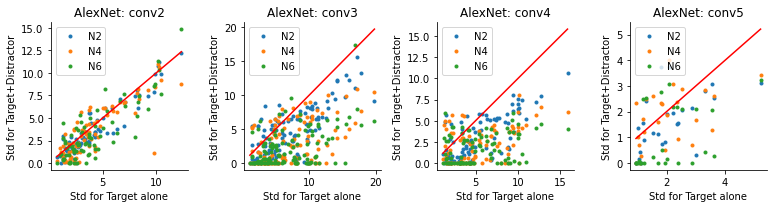

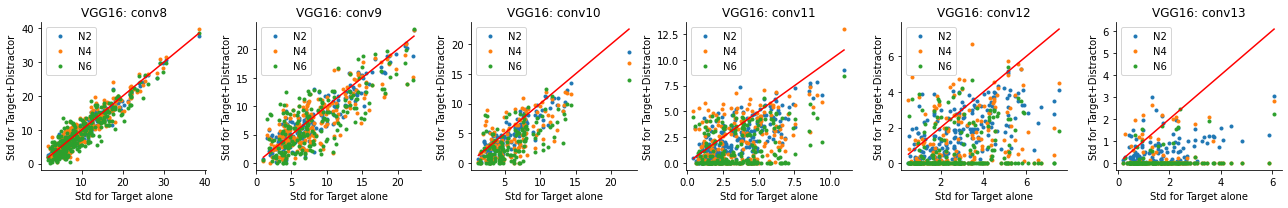

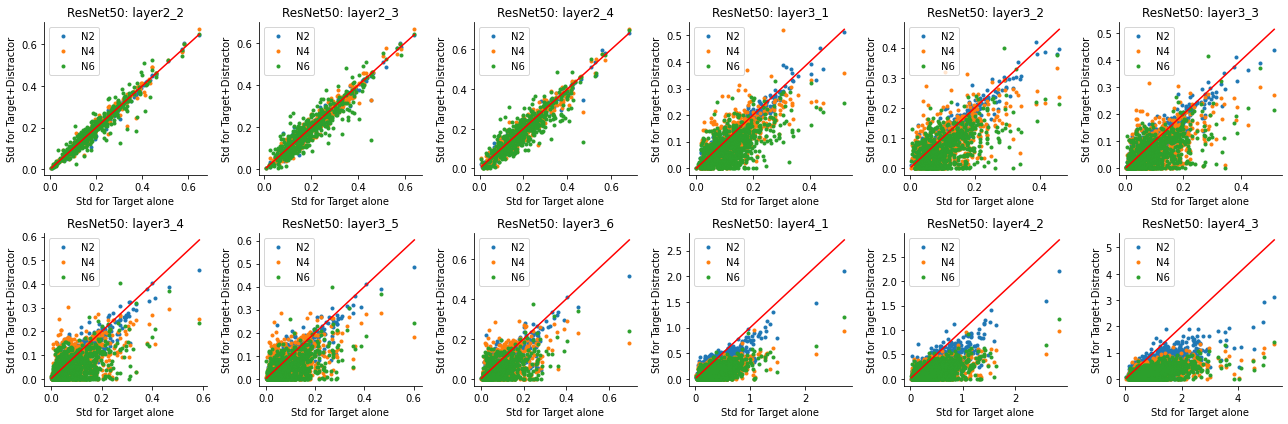

In [ ]:
### standard deviation: distractor number effect. scatter

# AlexNet
plt.figure(figsize=(10.85,3));
for i in range(len(stdMtx1)):
    plt.subplot(1,4,i+1)
    layerNow = list(stdMtx1.keys())[i];
    plt.plot(stdMtx1[layerNow]['coTar'],stdMtx1[layerNow]['coTar_coDis2'],'.',label='N2');                     
    plt.plot(stdMtx1[layerNow]['coTar'],stdMtx1[layerNow]['coTar_coDis4'],'.',label='N4');                     
    plt.plot(stdMtx1[layerNow]['coTar'],stdMtx1[layerNow]['coTar_coDis6'],'.',label='N6');  
    plt.plot([stdMtx1[layerNow]['coTar'].min(),stdMtx1[layerNow]['coTar'].max()],
             [stdMtx1[layerNow]['coTar'].min(),stdMtx1[layerNow]['coTar'].max()],'r')                   
    plt.xlabel('Std for Target alone');
    plt.ylabel('Std for Target+Distractor');
    plt.legend(loc='upper left')
    plt.title('AlexNet: '+layerNow);
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
plt.tight_layout();

# VGG16
plt.figure(figsize=(18,3));
for i in range(len(stdMtx2)):
    plt.subplot(1,6,i+1)
    layerNow = list(stdMtx2.keys())[i];
    plt.plot(stdMtx2[layerNow]['coTar'],stdMtx2[layerNow]['coTar_coDis2'],'.',label='N2');                     
    plt.plot(stdMtx2[layerNow]['coTar'],stdMtx2[layerNow]['coTar_coDis4'],'.',label='N4');                     
    plt.plot(stdMtx2[layerNow]['coTar'],stdMtx2[layerNow]['coTar_coDis6'],'.',label='N6');  
    plt.plot([stdMtx2[layerNow]['coTar'].min(),stdMtx2[layerNow]['coTar'].max()],
             [stdMtx2[layerNow]['coTar'].min(),stdMtx2[layerNow]['coTar'].max()],'r')                   
    plt.xlabel('Std for Target alone');
    plt.ylabel('Std for Target+Distractor');
    plt.legend(loc='upper left')
    plt.title('VGG16: '+layerNow);
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
plt.tight_layout();

# ResNet50
plt.figure(figsize=(18,6));
for i in range(len(stdMtx3)):
    plt.subplot(2,6,i+1)
    layerNow = list(stdMtx3.keys())[i];
    plt.plot(stdMtx3[layerNow]['coTar'],stdMtx3[layerNow]['coTar_coDis2'],'.',label='N2');                     
    plt.plot(stdMtx3[layerNow]['coTar'],stdMtx3[layerNow]['coTar_coDis4'],'.',label='N4');                     
    plt.plot(stdMtx3[layerNow]['coTar'],stdMtx3[layerNow]['coTar_coDis6'],'.',label='N6');  
    plt.plot([stdMtx3[layerNow]['coTar'].min(),stdMtx3[layerNow]['coTar'].max()],
             [stdMtx3[layerNow]['coTar'].min(),stdMtx3[layerNow]['coTar'].max()],'r')                   
    plt.xlabel('Std for Target alone');
    plt.ylabel('Std for Target+Distractor');
    plt.legend(loc='upper left')
    plt.title('ResNet50: '+layerNow);
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
plt.tight_layout();

[]


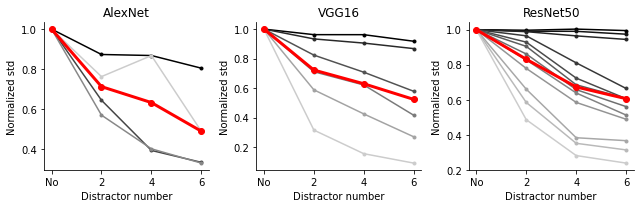

In [ ]:
### standard deviation: distractor number effect. line

plt.figure(figsize=(9,3));

# AlexNet
plt.subplot(1,3,1);
y_val_all = np.empty([4,0]);
print(y_val_all)
for i in range(len(stdMtx1)):
    layerNow = list(stdMtx1.keys())[i];
    y_val = [stdMtx1[layerNow]['coTar'].mean(),
             stdMtx1[layerNow]['coTar_coDis2'].mean(),
             stdMtx1[layerNow]['coTar_coDis4'].mean(),
             stdMtx1[layerNow]['coTar_coDis6'].mean()];
    y_val = np.divide(y_val,y_val[0])
    y_val_all = np.concatenate((y_val_all,np.reshape(y_val,(4,1))),axis=1)
    line_color = i*np.array([0.8,0.8,0.8])/(len(stdMtx1)-1)    
    plt.plot(range(4),y_val,'.-',color=line_color);             
plt.plot(range(4),np.mean(y_val_all,axis=1),'ro-',linewidth=3);                 
plt.xticks(ticks=[0,1,2,3],labels=['No',2,4,6]);    
plt.xlabel('Distractor number');
plt.ylabel('Normalized std');
plt.title('AlexNet');
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# VGG16
plt.subplot(1,3,2);
y_val_all = np.empty([4,0]);
for i in range(len(stdMtx2)):
    layerNow = list(stdMtx2.keys())[i];
    y_val = [stdMtx2[layerNow]['coTar'].mean(),
             stdMtx2[layerNow]['coTar_coDis2'].mean(),
             stdMtx2[layerNow]['coTar_coDis4'].mean(),
             stdMtx2[layerNow]['coTar_coDis6'].mean()];
    y_val = np.divide(y_val,y_val[0])
    y_val_all = np.concatenate((y_val_all,np.reshape(y_val,(4,1))),axis=1)
    line_color = i*np.array([0.8,0.8,0.8])/(len(stdMtx2)-1)    
    plt.plot(range(4),y_val,'.-',color=line_color);             
plt.plot(range(4),np.mean(y_val_all,axis=1),'ro-',linewidth=3);                 
plt.xticks(ticks=[0,1,2,3],labels=['No',2,4,6]);    
plt.xlabel('Distractor number');
plt.ylabel('Normalized std');
plt.title('VGG16');
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# RexNet50
plt.subplot(1,3,3);
y_val_all = np.empty([4,0]);
for i in range(len(stdMtx3)):
    layerNow = list(stdMtx3.keys())[i];
    y_val = [stdMtx3[layerNow]['coTar'].mean(),
             stdMtx3[layerNow]['coTar_coDis2'].mean(),
             stdMtx3[layerNow]['coTar_coDis4'].mean(),
             stdMtx3[layerNow]['coTar_coDis6'].mean()];
    y_val = np.divide(y_val,y_val[0])
    y_val_all = np.concatenate((y_val_all,np.reshape(y_val,(4,1))),axis=1)
    line_color = i*np.array([0.8,0.8,0.8])/(len(stdMtx3)-1)    
    plt.plot(range(4),y_val,'.-',color=line_color);             
plt.plot(range(4),np.mean(y_val_all,axis=1),'ro-',linewidth=3);                 
plt.xticks(ticks=[0,1,2,3],labels=['No',2,4,6]);    
plt.xlabel('Distractor number');
plt.ylabel('Normalized std');
plt.title('ResNet50');
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig('number_std_3ANNs.pdf', bbox_inches = "tight")

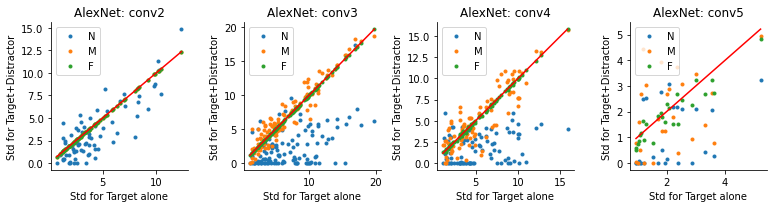

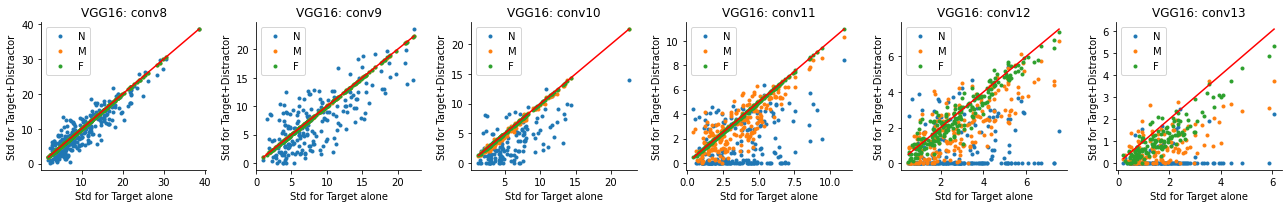

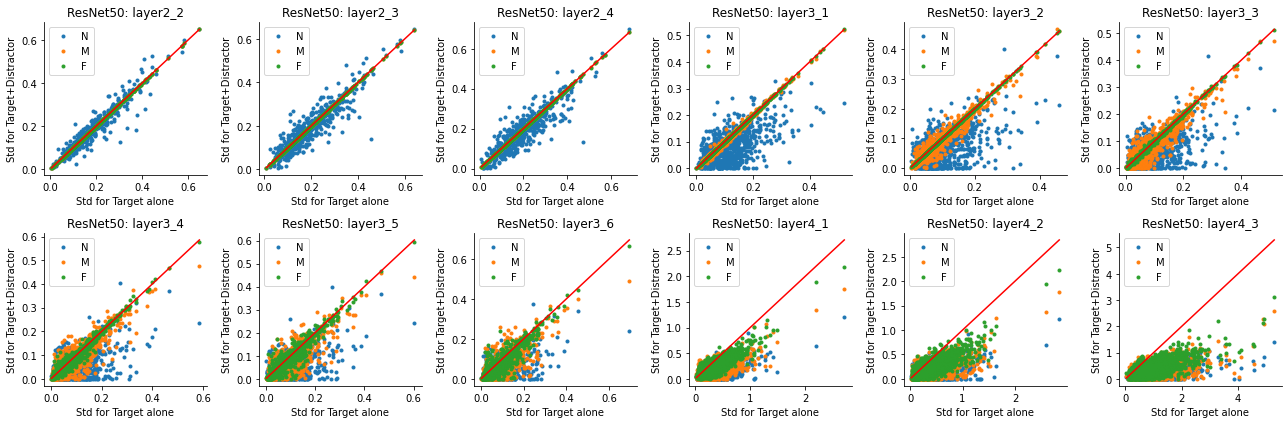

In [ ]:
### standard deviation: distractor distance effect. scatter

# AlexNet
plt.figure(figsize=(10.85,3));
for i in range(len(stdMtx1)):
    plt.subplot(1,4,i+1)
    layerNow = list(stdMtx1.keys())[i];
    plt.plot(stdMtx1[layerNow]['coTar'],stdMtx1[layerNow]['coTar_coDis6'],'.',label='N');                     
    plt.plot(stdMtx1[layerNow]['coTar'],stdMtx1[layerNow]['coTar_coDis12'],'.',label='M');                     
    plt.plot(stdMtx1[layerNow]['coTar'],stdMtx1[layerNow]['coTar_coDis18'],'.',label='F');  
    plt.plot([stdMtx1[layerNow]['coTar'].min(),stdMtx1[layerNow]['coTar'].max()],
             [stdMtx1[layerNow]['coTar'].min(),stdMtx1[layerNow]['coTar'].max()],'r')                   
    plt.xlabel('Std for Target alone');
    plt.ylabel('Std for Target+Distractor');
    plt.legend(loc='upper left')
    plt.title('AlexNet: '+layerNow);
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
plt.tight_layout();

# VGG16
plt.figure(figsize=(18,3));
for i in range(len(stdMtx2)):
    plt.subplot(1,6,i+1)
    layerNow = list(stdMtx2.keys())[i];
    plt.plot(stdMtx2[layerNow]['coTar'],stdMtx2[layerNow]['coTar_coDis6'],'.',label='N');                     
    plt.plot(stdMtx2[layerNow]['coTar'],stdMtx2[layerNow]['coTar_coDis12'],'.',label='M');                     
    plt.plot(stdMtx2[layerNow]['coTar'],stdMtx2[layerNow]['coTar_coDis18'],'.',label='F');  
    plt.plot([stdMtx2[layerNow]['coTar'].min(),stdMtx2[layerNow]['coTar'].max()],
             [stdMtx2[layerNow]['coTar'].min(),stdMtx2[layerNow]['coTar'].max()],'r')                   
    plt.xlabel('Std for Target alone');
    plt.ylabel('Std for Target+Distractor');
    plt.legend(loc='upper left')
    plt.title('VGG16: '+layerNow);
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
plt.tight_layout();

# ResNet50
plt.figure(figsize=(18,6));
for i in range(len(stdMtx3)):
    plt.subplot(2,6,i+1)
    layerNow = list(stdMtx3.keys())[i];
    plt.plot(stdMtx3[layerNow]['coTar'],stdMtx3[layerNow]['coTar_coDis6'],'.',label='N');                     
    plt.plot(stdMtx3[layerNow]['coTar'],stdMtx3[layerNow]['coTar_coDis12'],'.',label='M');                     
    plt.plot(stdMtx3[layerNow]['coTar'],stdMtx3[layerNow]['coTar_coDis18'],'.',label='F');  
    plt.plot([stdMtx3[layerNow]['coTar'].min(),stdMtx3[layerNow]['coTar'].max()],
             [stdMtx3[layerNow]['coTar'].min(),stdMtx3[layerNow]['coTar'].max()],'r')                   
    plt.xlabel('Std for Target alone');
    plt.ylabel('Std for Target+Distractor');
    plt.legend(loc='upper left')
    plt.title('ResNet50: '+layerNow);
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
plt.tight_layout();

[]


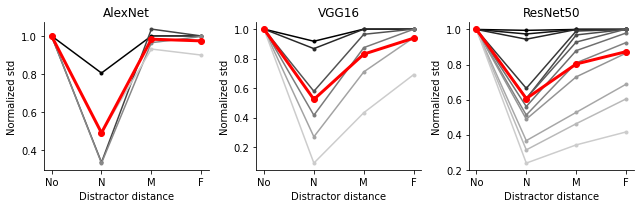

In [ ]:
### standard deviation: distractor distance effect. line

plt.figure(figsize=(9,3));

# AlexNet
plt.subplot(1,3,1);
y_val_all = np.empty([4,0]);
print(y_val_all)
for i in range(len(stdMtx1)):
    layerNow = list(stdMtx1.keys())[i];
    y_val = [stdMtx1[layerNow]['coTar'].mean(),
             stdMtx1[layerNow]['coTar_coDis6'].mean(),
             stdMtx1[layerNow]['coTar_coDis12'].mean(),
             stdMtx1[layerNow]['coTar_coDis18'].mean()];
    y_val = np.divide(y_val,y_val[0])             
    y_val_all = np.concatenate((y_val_all,np.reshape(y_val,(4,1))),axis=1)
    line_color = i*np.array([0.8,0.8,0.8])/(len(stdMtx1)-1)    
    plt.plot(range(4),y_val,'.-',color=line_color);             
plt.plot(range(4),np.mean(y_val_all,axis=1),'ro-',linewidth=3);                 
plt.xticks(ticks=[0,1,2,3],labels=['No','N','M','F']);    
plt.xlabel('Distractor distance');
plt.ylabel('Normalized std');
plt.title('AlexNet');
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# VGG16
plt.subplot(1,3,2);
y_val_all = np.empty([4,0]);
for i in range(len(stdMtx2)):
    layerNow = list(stdMtx2.keys())[i];
    y_val = [stdMtx2[layerNow]['coTar'].mean(),
             stdMtx2[layerNow]['coTar_coDis6'].mean(),
             stdMtx2[layerNow]['coTar_coDis12'].mean(),
             stdMtx2[layerNow]['coTar_coDis18'].mean()];
    y_val = np.divide(y_val,y_val[0])             
    y_val_all = np.concatenate((y_val_all,np.reshape(y_val,(4,1))),axis=1)
    line_color = i*np.array([0.8,0.8,0.8])/(len(stdMtx2)-1)    
    plt.plot(range(4),y_val,'.-',color=line_color);             
plt.plot(range(4),np.mean(y_val_all,axis=1),'ro-',linewidth=3);                 
plt.xticks(ticks=[0,1,2,3],labels=['No','N','M','F']);    
plt.xlabel('Distractor distance');
plt.ylabel('Normalized std');
plt.title('VGG16');
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# RexNet50
plt.subplot(1,3,3);
y_val_all = np.empty([4,0]);
for i in range(len(stdMtx3)):
    layerNow = list(stdMtx3.keys())[i];
    y_val = [stdMtx3[layerNow]['coTar'].mean(),
             stdMtx3[layerNow]['coTar_coDis6'].mean(),
             stdMtx3[layerNow]['coTar_coDis12'].mean(),
             stdMtx3[layerNow]['coTar_coDis18'].mean()];
    y_val = np.divide(y_val,y_val[0])             
    y_val_all = np.concatenate((y_val_all,np.reshape(y_val,(4,1))),axis=1)
    line_color = i*np.array([0.8,0.8,0.8])/(len(stdMtx3)-1)    
    plt.plot(range(4),y_val,'.-',color=line_color);             
plt.plot(range(4),np.mean(y_val_all,axis=1),'ro-',linewidth=3);                 
plt.xticks(ticks=[0,1,2,3],labels=['No','N','M','F']);    
plt.xlabel('Distractor distance');
plt.ylabel('Normalized std');
plt.title('ResNet50');
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig('distance_std_3ANNs.pdf', bbox_inches = "tight")

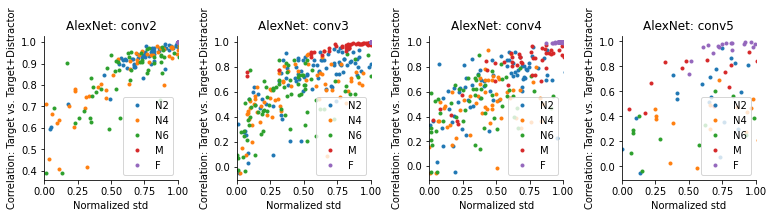

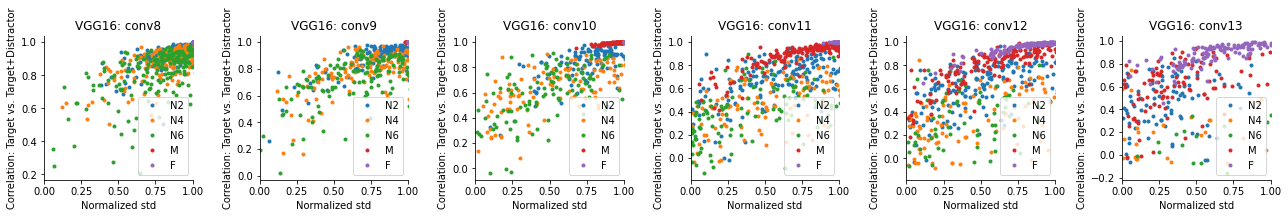

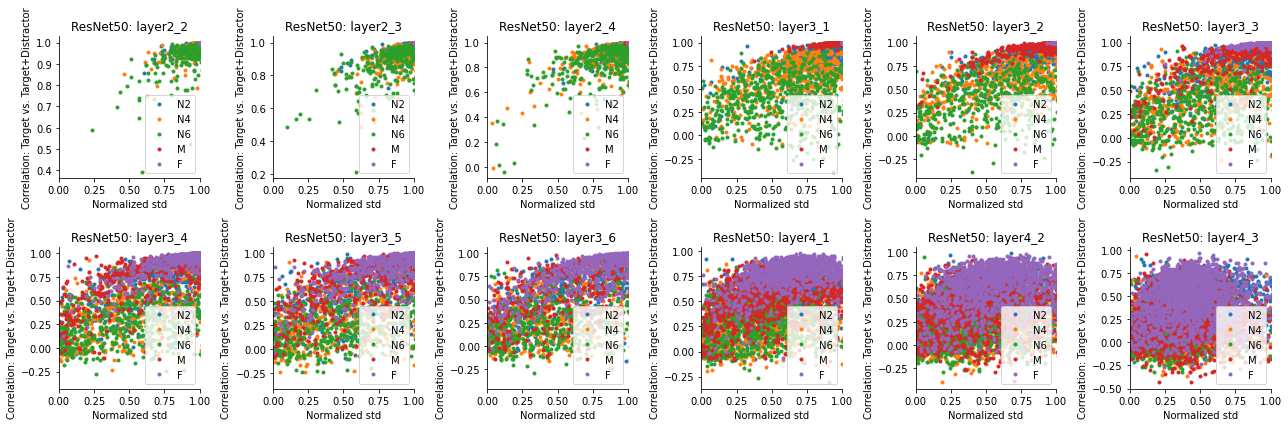

In [ ]:
### correlation vs. std

# AlexNet
plt.figure(figsize=(10.85,3));
for i in range(len(CorrMtx1)):
    plt.subplot(1,4,i+1)
    layerNow = list(CorrMtx1.keys())[i];
    plt.plot(stdMtx1[layerNow]['coTar_coDis2']/stdMtx1[layerNow]['coTar'],CorrMtx1[layerNow]['coTar_coDis2'],'.',label='N2');                     
    plt.plot(stdMtx1[layerNow]['coTar_coDis4']/stdMtx1[layerNow]['coTar'],CorrMtx1[layerNow]['coTar_coDis4'],'.',label='N4');                     
    plt.plot(stdMtx1[layerNow]['coTar_coDis6']/stdMtx1[layerNow]['coTar'],CorrMtx1[layerNow]['coTar_coDis6'],'.',label='N6');                     
    plt.plot(stdMtx1[layerNow]['coTar_coDis12']/stdMtx1[layerNow]['coTar'],CorrMtx1[layerNow]['coTar_coDis12'],'.',label='M');                     
    plt.plot(stdMtx1[layerNow]['coTar_coDis18']/stdMtx1[layerNow]['coTar'],CorrMtx1[layerNow]['coTar_coDis18'],'.',label='F');                     
    plt.xlabel('Normalized std');
    plt.ylabel('Correlation: Target vs. Target+Distractor');
    plt.legend(loc='lower right')
    plt.title('AlexNet: '+layerNow);
    plt.xlim([0,1]);
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
plt.tight_layout();

# VGG16
plt.figure(figsize=(18,3));
for i in range(len(CorrMtx2)):
    plt.subplot(1,6,i+1)
    layerNow = list(CorrMtx2.keys())[i];
    plt.plot(stdMtx2[layerNow]['coTar_coDis2']/stdMtx2[layerNow]['coTar'],CorrMtx2[layerNow]['coTar_coDis2'],'.',label='N2');                     
    plt.plot(stdMtx2[layerNow]['coTar_coDis4']/stdMtx2[layerNow]['coTar'],CorrMtx2[layerNow]['coTar_coDis4'],'.',label='N4');                     
    plt.plot(stdMtx2[layerNow]['coTar_coDis6']/stdMtx2[layerNow]['coTar'],CorrMtx2[layerNow]['coTar_coDis6'],'.',label='N6');                     
    plt.plot(stdMtx2[layerNow]['coTar_coDis12']/stdMtx2[layerNow]['coTar'],CorrMtx2[layerNow]['coTar_coDis12'],'.',label='M');                     
    plt.plot(stdMtx2[layerNow]['coTar_coDis18']/stdMtx2[layerNow]['coTar'],CorrMtx2[layerNow]['coTar_coDis18'],'.',label='F');                     
    plt.xlabel('Normalized std');
    plt.ylabel('Correlation: Target vs. Target+Distractor');
    plt.legend(loc='lower right')
    plt.title('VGG16: '+layerNow);
    plt.xlim([0,1]);
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
plt.tight_layout();

# ResNet50
plt.figure(figsize=(18,6));
for i in range(len(CorrMtx3)):
    plt.subplot(2,6,i+1)
    layerNow = list(CorrMtx3.keys())[i];
    plt.plot(stdMtx3[layerNow]['coTar_coDis2']/stdMtx3[layerNow]['coTar'],CorrMtx3[layerNow]['coTar_coDis2'],'.',label='N2');                     
    plt.plot(stdMtx3[layerNow]['coTar_coDis4']/stdMtx3[layerNow]['coTar'],CorrMtx3[layerNow]['coTar_coDis4'],'.',label='N4');                     
    plt.plot(stdMtx3[layerNow]['coTar_coDis6']/stdMtx3[layerNow]['coTar'],CorrMtx3[layerNow]['coTar_coDis6'],'.',label='N6');                     
    plt.plot(stdMtx3[layerNow]['coTar_coDis12']/stdMtx3[layerNow]['coTar'],CorrMtx3[layerNow]['coTar_coDis12'],'.',label='M');                     
    plt.plot(stdMtx3[layerNow]['coTar_coDis18']/stdMtx3[layerNow]['coTar'],CorrMtx3[layerNow]['coTar_coDis18'],'.',label='F');                     
    plt.xlabel('Normalized std');
    plt.ylabel('Correlation: Target vs. Target+Distractor');
    plt.legend(loc='lower right')
    plt.title('ResNet50: '+layerNow);
    plt.xlim([0,1]);
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
plt.tight_layout();

In [ ]:
layer = 'layer2_4';
cond = 'coTar'
dataMtx = stdMtx3 # CorrMtx1, meanRespMtx1, modulationMtx1, stdMtx1

#dataMtx[layer][(dataMtx[layer][cond]==dataMtx[layer][cond].max()) | (dataMtx[layer][cond]==dataMtx[layer][cond].min())][[cond]]
dataMtx[layer][cond].sort_values(ascending=False)

402    0.682540
505    0.570616
74     0.560370
167    0.532669
76     0.527356
         ...   
260         NaN
303         NaN
325         NaN
404         NaN
454         NaN
Name: coTar, Length: 512, dtype: float64

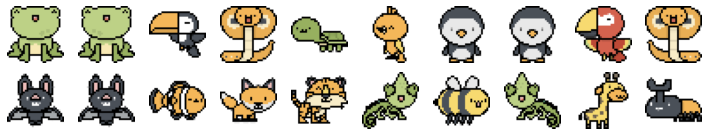

In [ ]:
modelname = 'vgg16';
layer = 'conv9';
unit = 45

dataNow = np.load(modelname+'_outputs.npz');
dataNow = dict(dataNow);


tResp = dataNow[layer][eval('coTar'),unit];
stimdir = '/content/gdrive/My Drive/UW_PasupathyLab/ShortTermWork/Artiphysiology2020/Animal_Icons/color_base/'

plt.figure(figsize=(10,2))
for i in range(10):
    snum = str(tResp.argsort()[::-1][i]).zfill(2);
    stim_now = stimdir+snum+'.png';

    plt.subplot(2,10,i+1);
    im = Image.open(stim_now);
    plt.axis('off')
    plt.imshow(im)

    snum = str(tResp.argsort()[i]).zfill(2);
    stim_now = stimdir+snum+'.png';

    plt.subplot(2,10,i+11);
    im = Image.open(stim_now);
    plt.axis('off')
    plt.imshow(im)


plt.tight_layout()